In [2]:
### Setup ###
from csv import reader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
from pandasql import *
from matplotlib.colors import LinearSegmentedColormap

filepath = "/Users/zachpolitz/Desktop/WorldBank_ESG.csv"

### Open data file ###
ESG_opened = open(filepath)
ESG_read_csv = pd.read_csv(ESG_opened)
ESG_raw = pd.DataFrame(ESG_read_csv)
ESG_cols = ESG_raw.columns

### Move '1961' after '1960' ###
sixty_one = ESG_raw['1961']
ESG_raw.drop(['1961'], axis = 1,inplace = True)
ESG_raw.insert(loc = 5, column = '1961', value = 0)
ESG_raw['1961'] = sixty_one

### Drop unused columns ###
ESG_raw = ESG_raw.drop(['Country Code','Indicator Code','2050'], axis = 1)

### Separate dataset into country and regional rows ###
ESG_by_country = ESG_raw.iloc[3082:]
ESG_by_region = ESG_raw.iloc[0:3082]

### Create lists of unique years, indicies, and countries 
ESG_indicies = ESG_raw['Indicator Name'].unique()
ESG_years = ESG_raw.columns[2:] # get all columns except'Country Name' and 'Indicator Name'.
ESG_countries = ESG_by_country['Country Name'].unique()
ESG_regions = ESG_by_region['Country Name'].unique()

In [3]:
### Reporting activity/ null counts {country: year: sum_across_indicies(nulls)} ###
annual_null_counts = {}

for country in ESG_countries: 
    year_raw = ESG_by_country[ESG_by_country['Country Name'] == country]
    year_nulls = {}
    for year in ESG_years:
        nulls = 0
        years_data = year_raw[year]
        for indx in years_data:
            indx = str(indx)
            # data type is float, but value prints 'nan'
            if indx == 'nan':
                nulls += 1
        year_nulls[year] = nulls
    annual_null_counts[country] = year_nulls

### Reporting density dictionary: {region: year: sum_across_indicies(nulls)} ###
annual_null_counts_region = {}
for region in ESG_regions: 
    year_raw = ESG_by_region[ESG_by_region['Country Name'] == region]
    year_nulls = {}
    for year in ESG_years:
        nulls = 0
        years_data = year_raw[year]
        for indx in years_data:
            indx = str(indx)
            if indx == 'nan':
                nulls += 1
        year_nulls[year] = nulls
    annual_null_counts_region[region] = year_nulls
    
### Reporting density dictionary: {index: year: sum_across_countries(nulls)}

index_nulls_annual_sum = {}
for indx in ESG_indicies:
    index_nulls_annual_sum[indx] = {}
    d_set = ESG_by_country[ESG_by_country['Indicator Name'] == indx] # One index
    for year in ESG_years:  # One year
        d_vec = d_set[year]
        d = 0
        for row in d_vec: # One country
            if str(row) == 'nan': # Is the value null?
                d+= 1
        index_nulls_annual_sum[indx][year]= d

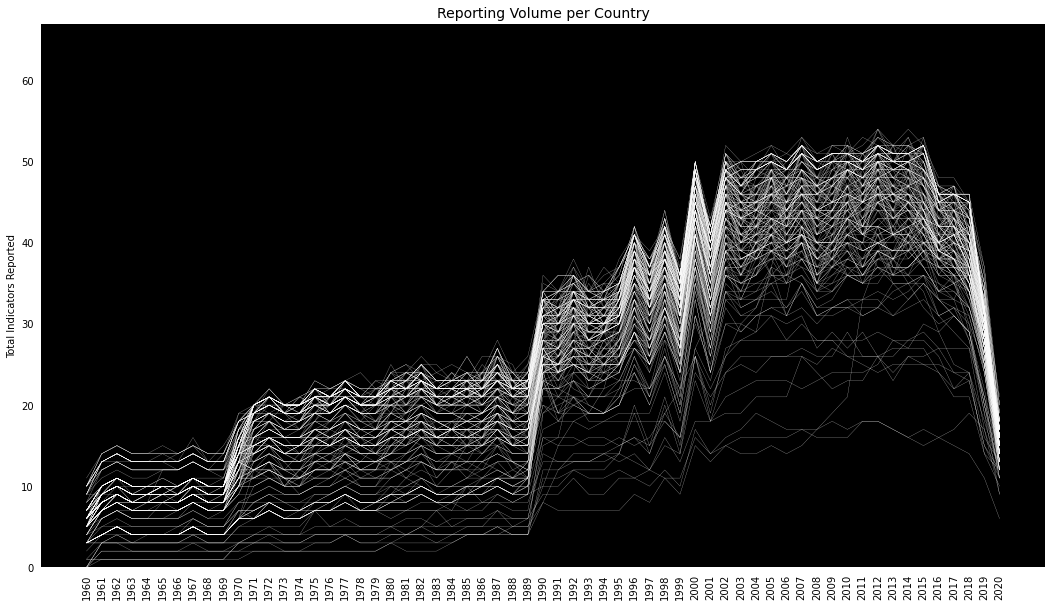

In [9]:
### Plot Line Graph for every country's number of metrics reported

fig, ax = plt.subplots()
fig.set_figwidth(18)
fig.set_figheight(10)
ax.set_ylim(top=67)
fig.set_facecolor('white')
ax.set_ylabel("Total Indicators Reported")
ax.tick_params(axis = 'x',labelsize = 10, bottom=False, rotation = 90)
ax.tick_params(axis = 'y', left=False)

ax.set_title("Reporting Volume per Country",fontsize = 14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

country_count = 0
for country in ESG_countries:
    x = []
    y = []
    for year in ESG_years:
        d = annual_null_counts[country][year]
        x.append(67 - d)
        y.append(year)
    ax.plot(y,x, c = 'white', lw = .2)
    country_count += 1
ax.set_facecolor('black')

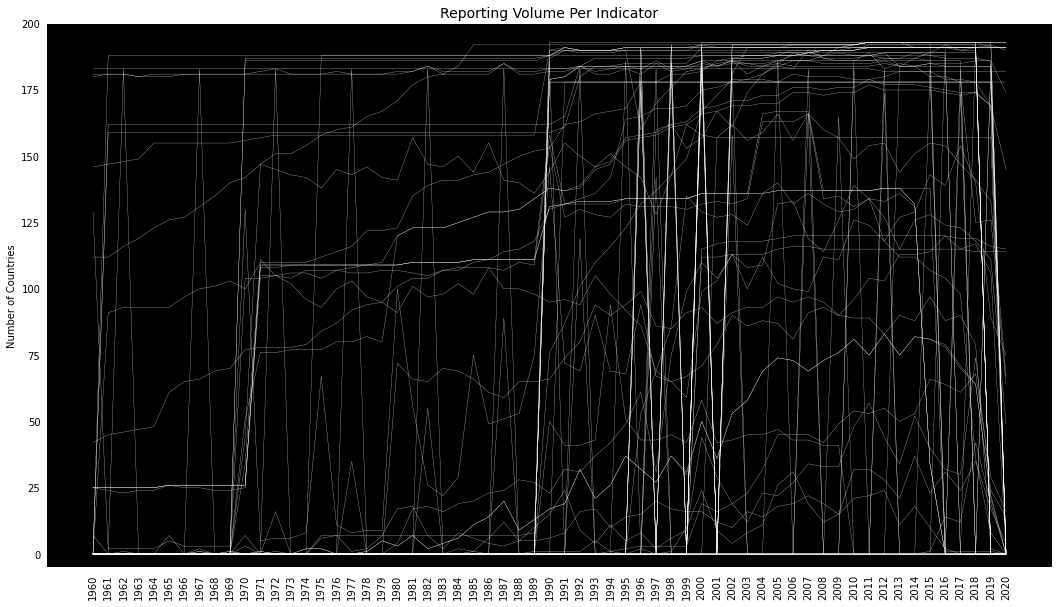

In [10]:
fig, ax = plt.subplots()
fig.set_figwidth(18)
fig.set_figheight(10)
fig.set_facecolor('white')
ax.set_ylim(top=200,bottom = -5)
ax.set_ylabel("Number of Countries")
ax.tick_params(axis = 'x',labelsize = 10, bottom=False, rotation = 90)
ax.tick_params(axis = 'y', left=False)

ax.set_title("Reporting Volume Per Indicator",fontsize = 14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(False)

index_count = 0
for indx in ESG_indicies:
    x = []
    y = []
    for year in ESG_years:
        d = index_nulls_annual_sum[indx][year]
        x.append(193 - d)
        y.append(year)
    ax.plot(y,x, c = 'white', lw = .25)

ax.set_facecolor('black')
   

In [5]:

# sort indicies by number of nulls:
# 
# bubble sort takes in two lists, the first with numerical values and the seconds with their non-numerical labels
# Feed in the list of total null counts for each country, and a the list of corresponding country names.
# Output is the sorted numerical values as well as a list of countries in the same order, which will be used in the next cell.

def bubble_sort(list_1, list_2): 
    high_idx = len(list_1)-1
    for i in range (0,high_idx):
        list_changed = False
        for j in range (0,high_idx):
            item_1 = list_1[j]
            next_1 = list_1[j+1]
            item_2 = list_2[j]
            next_2 = list_2[j+1]
            if item_1 > next_1:
                list_1[j] = next_1
                list_1[j+1] = item_1
                list_2[j] = next_2
                list_2[j+1] = item_2

                list_changed = True
            #print(list_1,list_2,i,j)

        #print(list_changed)
        if list_changed == False:
            break

null_indicies = ESG_indicies.copy()
null_list = []
for index in ESG_indicies:
    i_nulls = index_nulls_annual_sum[index]
    x = 0
    for year in ESG_years:
        x += (i_nulls[year])
    #print(country,x)
    null_list.append(x)

bubble_sort(null_list,null_indicies)


#[print(null_indicies[i]) for i in range(0,len(null_indicies))]

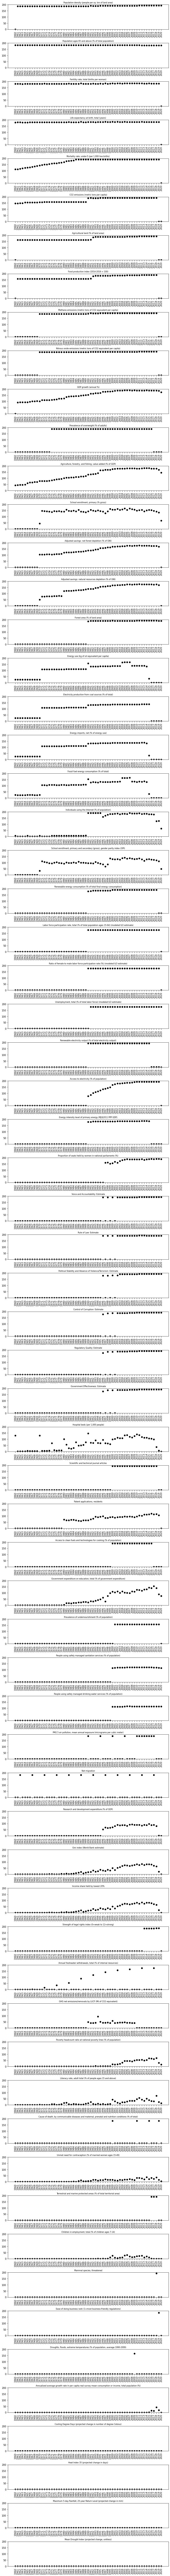

In [6]:
S_indicies = null_indicies.copy()
fig, ax = plt.subplots(nrows = len(S_indicies))
fig.set_figwidth(10)
fig.set_figheight(150)

#fig.set_facecolor('white')


for row in range(0,len(S_indicies)):
    for year in ESG_years:
        ax[row].scatter(year,193-index_nulls_annual_sum[S_indicies[row]][year], c = 'black')
    ax[row].set_ylim(0,200)
    ax[row].set_title(S_indicies[row], size=8)
    ax[row].tick_params(axis = 'x',rotation = 90, size=5)
plt.tight_layout()

In [9]:
# Figure Setup

def plot_function(i):
    indx = null_indicies[i]
    shape = '''
    000
    000
    000
    000
    111
    '''
    fig, ax = plt.subplot_mosaic(shape)
    fig.set_figwidth(15)
    fig.set_figheight(10)
    fig.set_facecolor('white')


    # Set plot parameters
    if "GDP" in indx:
        ax['0'].set_ylim(-75,150)
    elif '%' in indx:
        ax['0'].set_ylim(-5,105)

    ax['0'].set_facecolor('black')
    ax['0'].tick_params(axis = 'x',labelsize = 8, bottom=False, rotation = 90)
    ax['0'].set_title((str(i+1)+'. ' + indx), size=15)         

    # Plot data
    data = ESG_by_country[ESG_by_country['Indicator Name'] == indx]
    for year in ESG_years:
        year_list = [year] * 193
        filler = np.zeros(len(year_list))
        ax['0'].scatter(year_list, filler, alpha = 0  )
        ax['0'].scatter(year_list, data[year], color='white', s=15, marker='.', alpha = .4  )

    # Plot null values                       
    for year in ESG_years:
        ax['1'].scatter((year[-2:]+"'"),193-index_nulls_annual_sum[indx][year], c = 'black', s = 15)

    # Set null plot parameters
    ax['1'].set_ylim(0,200)
    ax['1'].set_title('Number of Reporting Countries (193 total)', size=10)         
    ax['1'].tick_params(axis = 'x',rotation = 90, size=10)

    plt.tight_layout()
    
    fig.savefig("/Users/zachpolitz/Desktop/WB_ESG_graphs/Insta_plots/" + "plot_" + str(i+1) + ".jpg")

<ipython-input-9-61a8a74d9ecc>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplot_mosaic(shape)


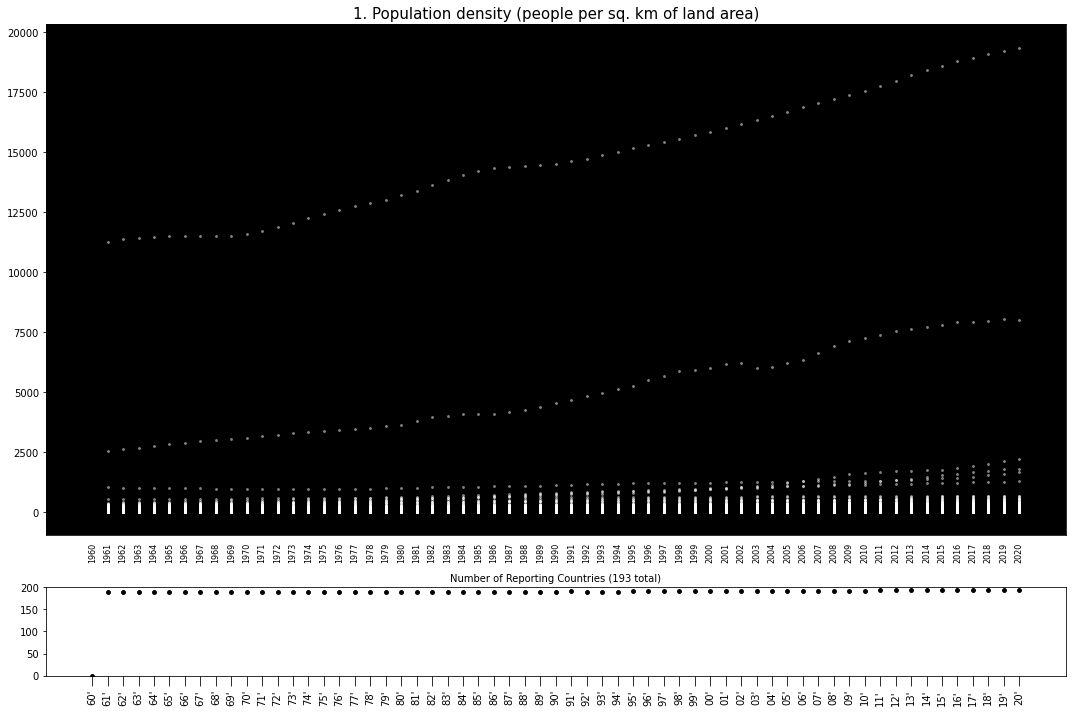

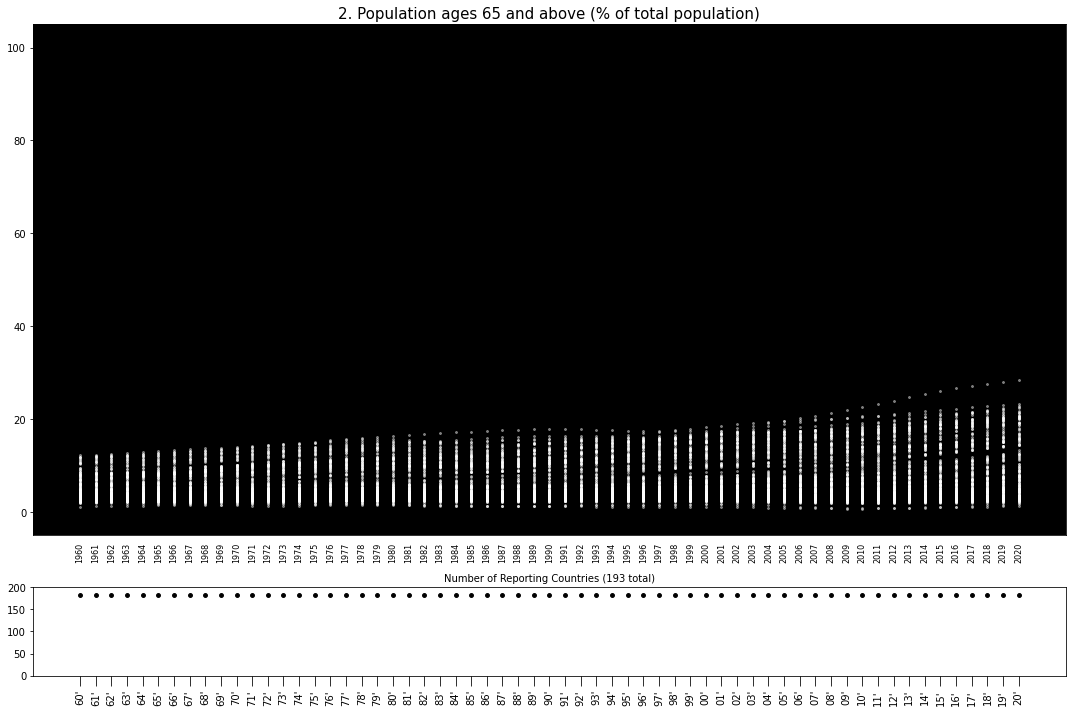

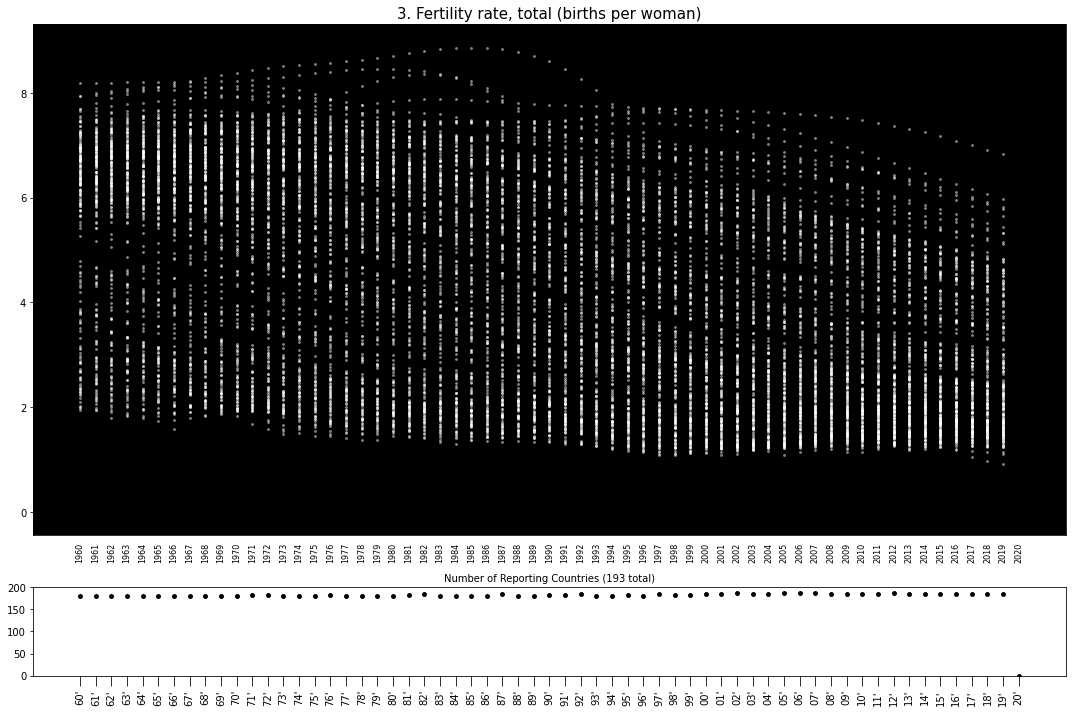

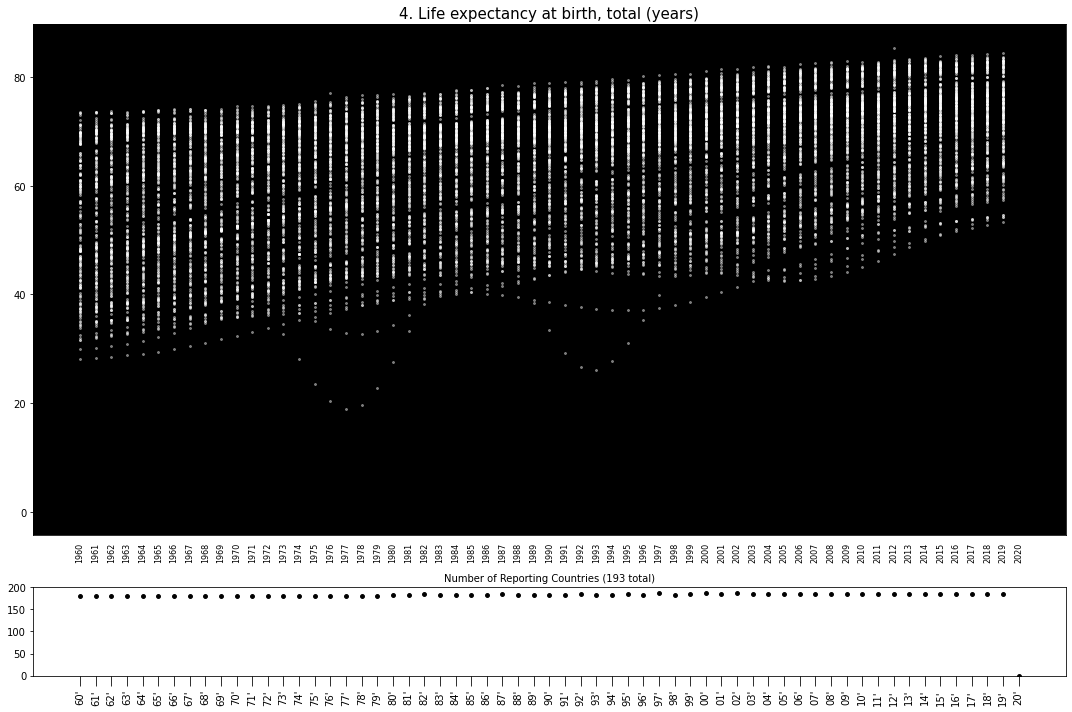

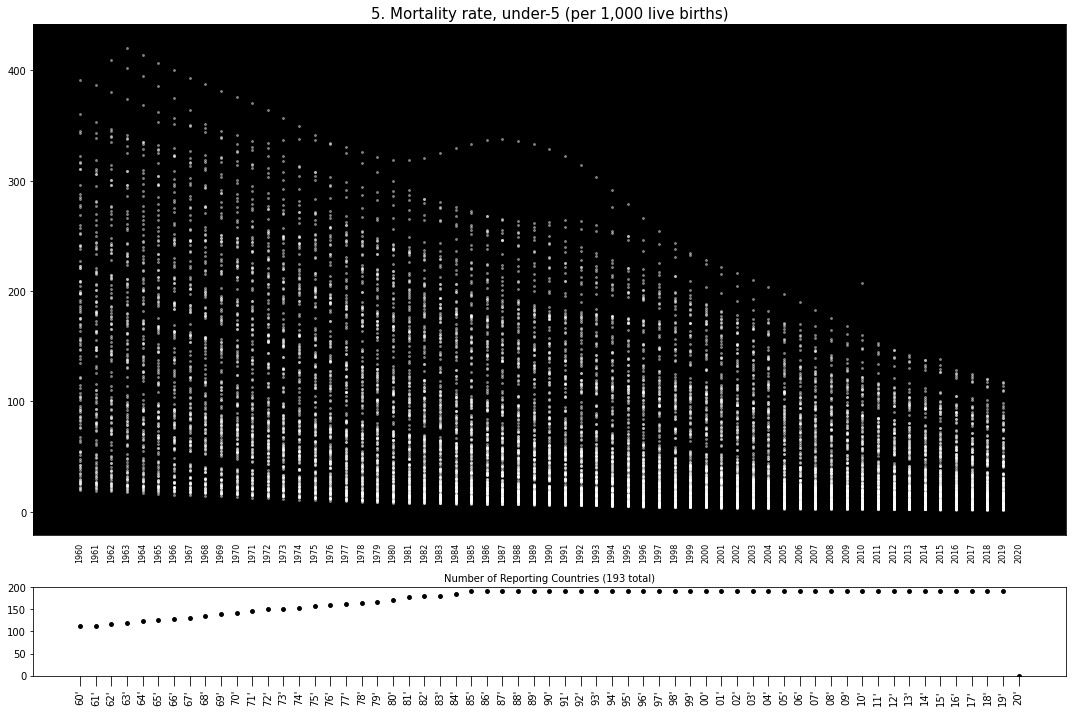

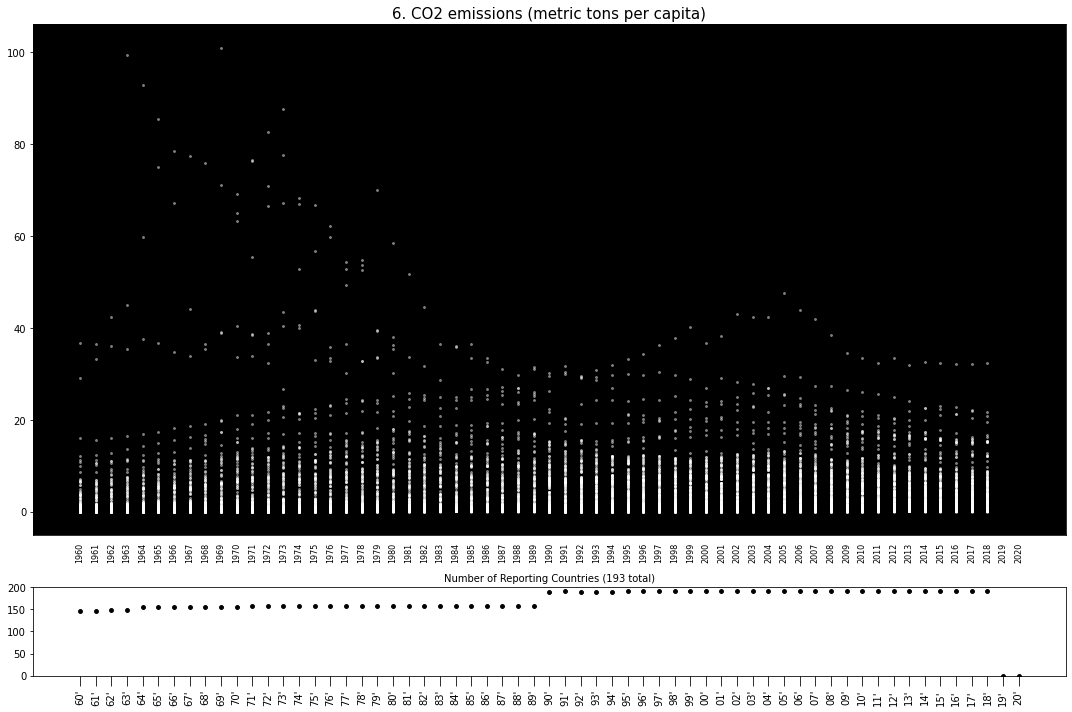

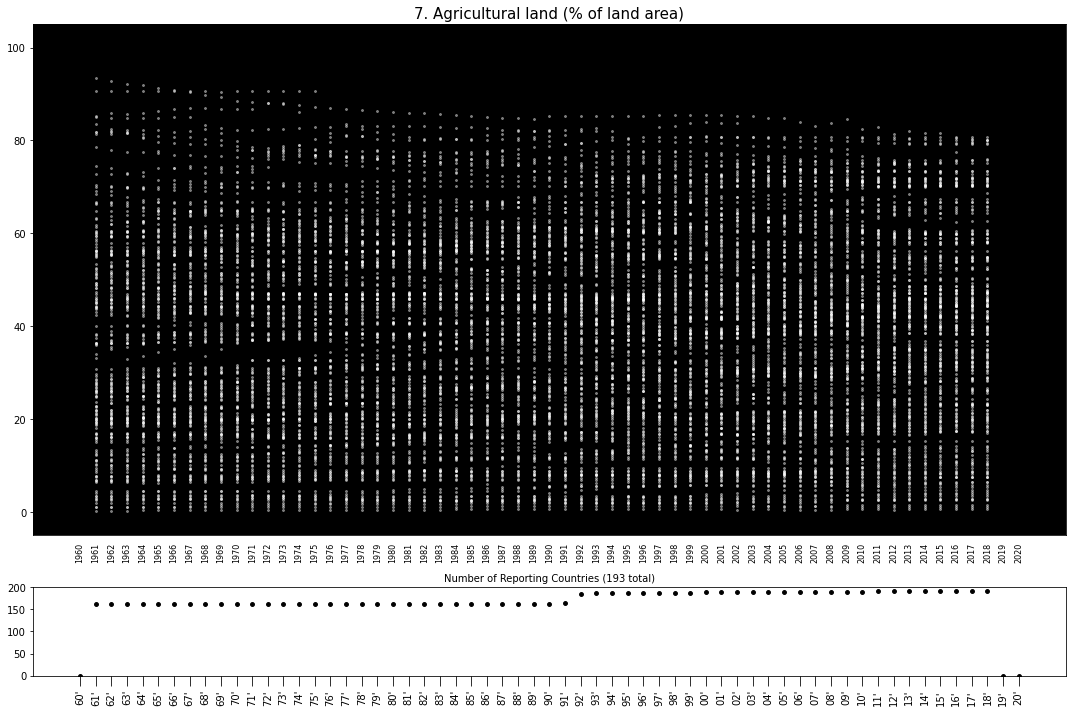

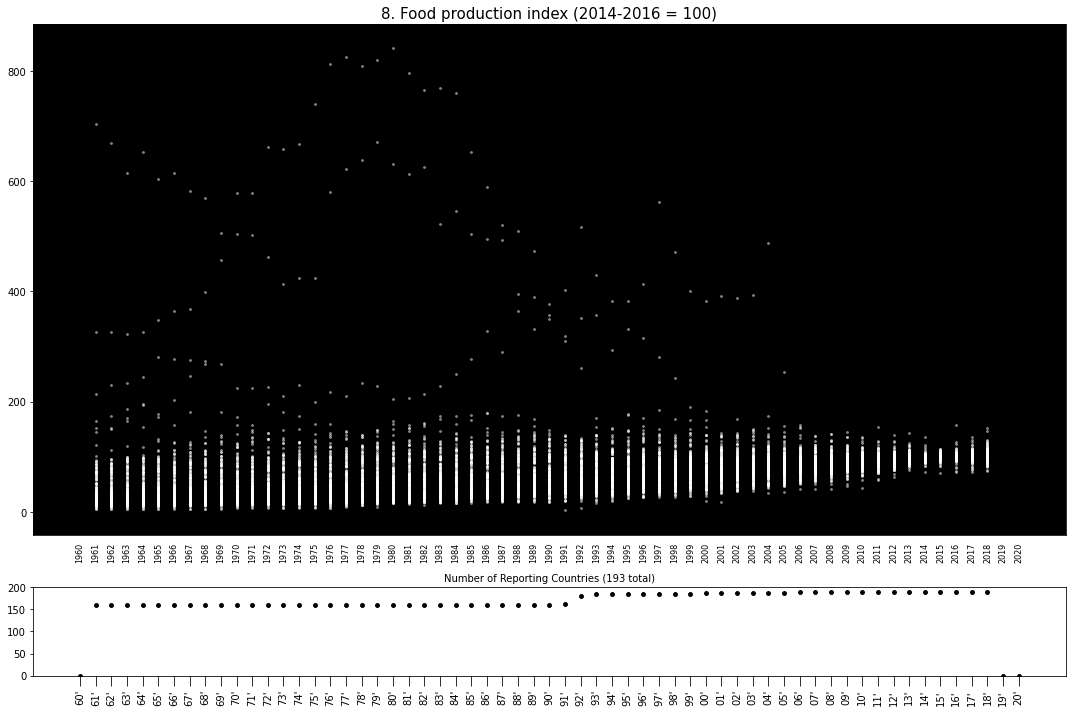

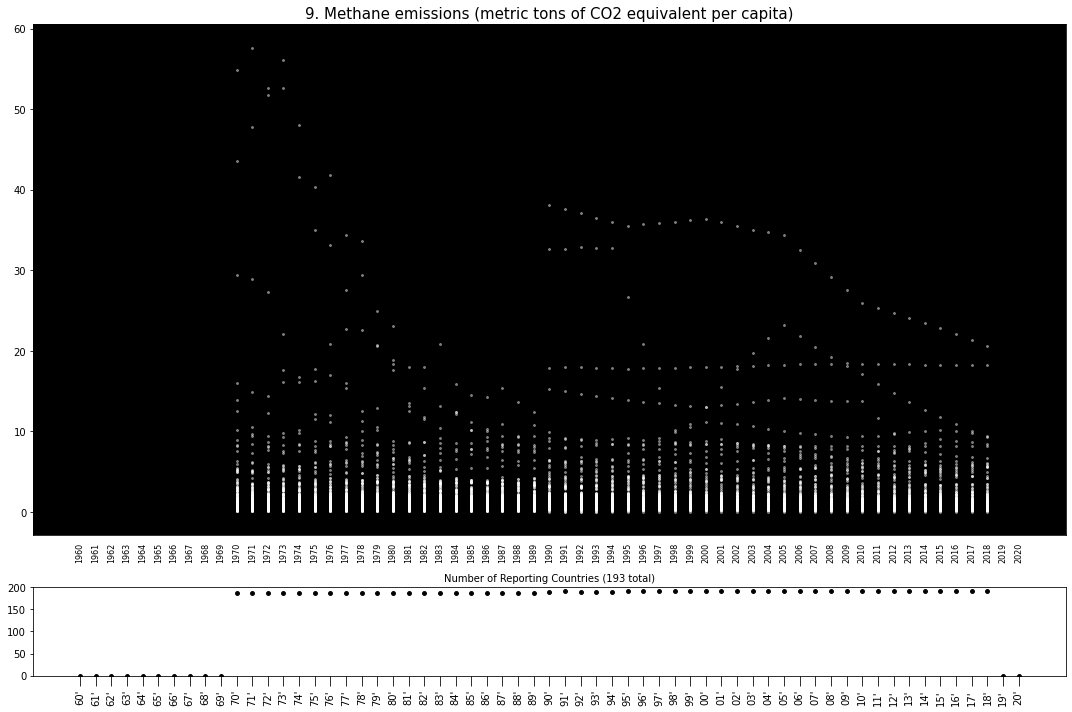

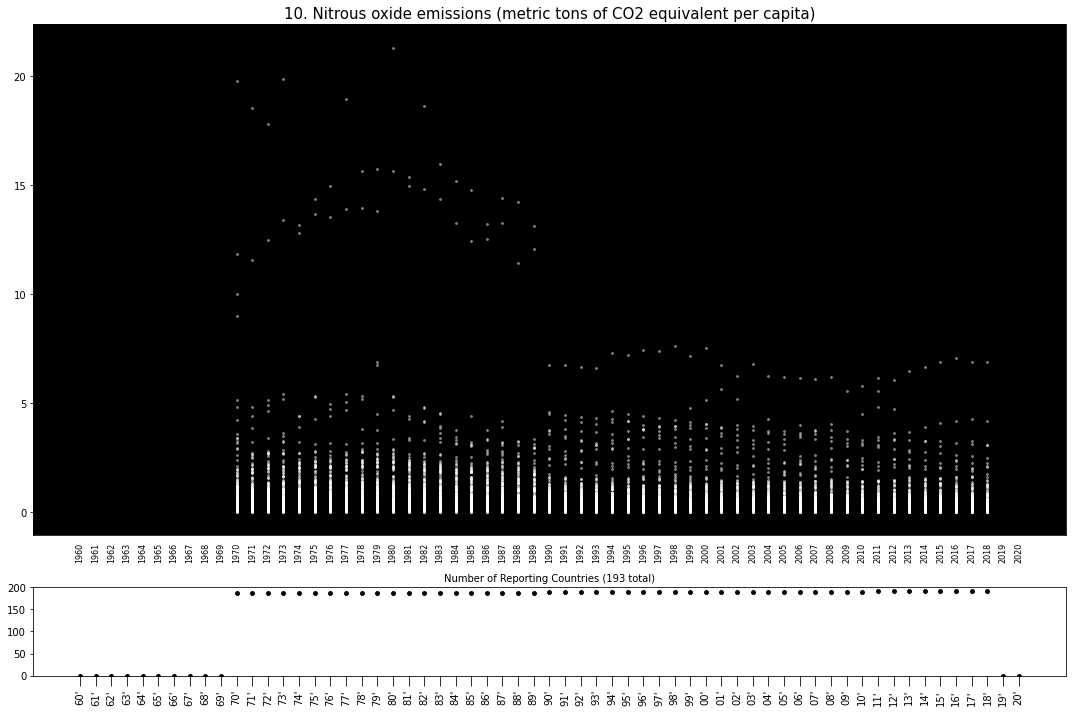

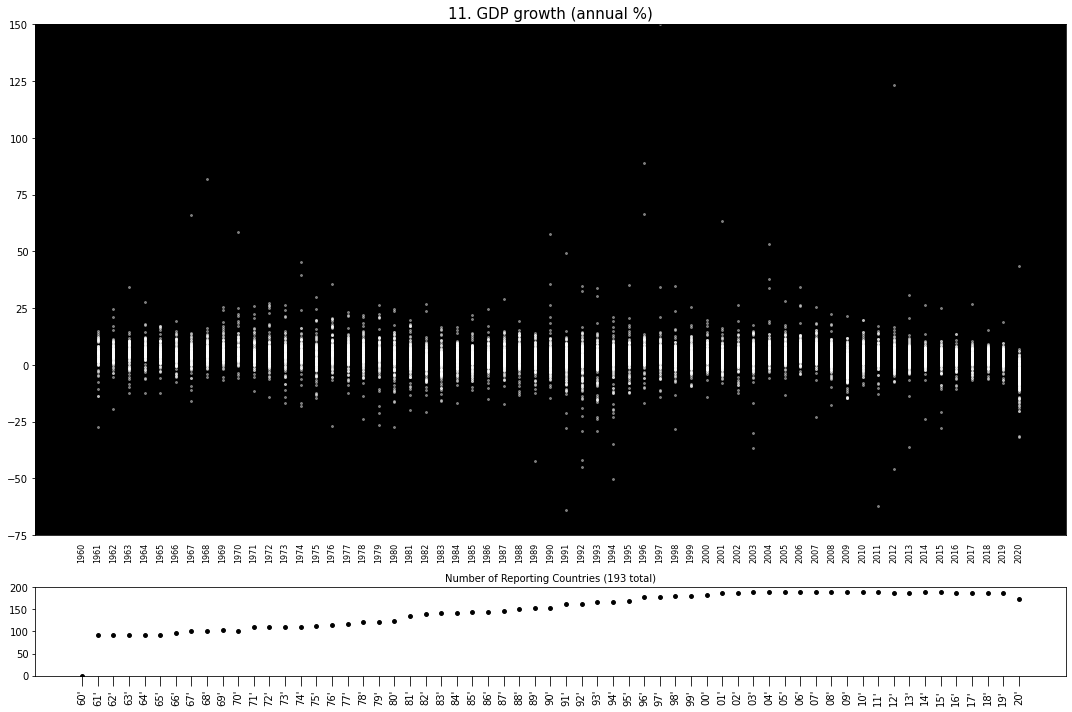

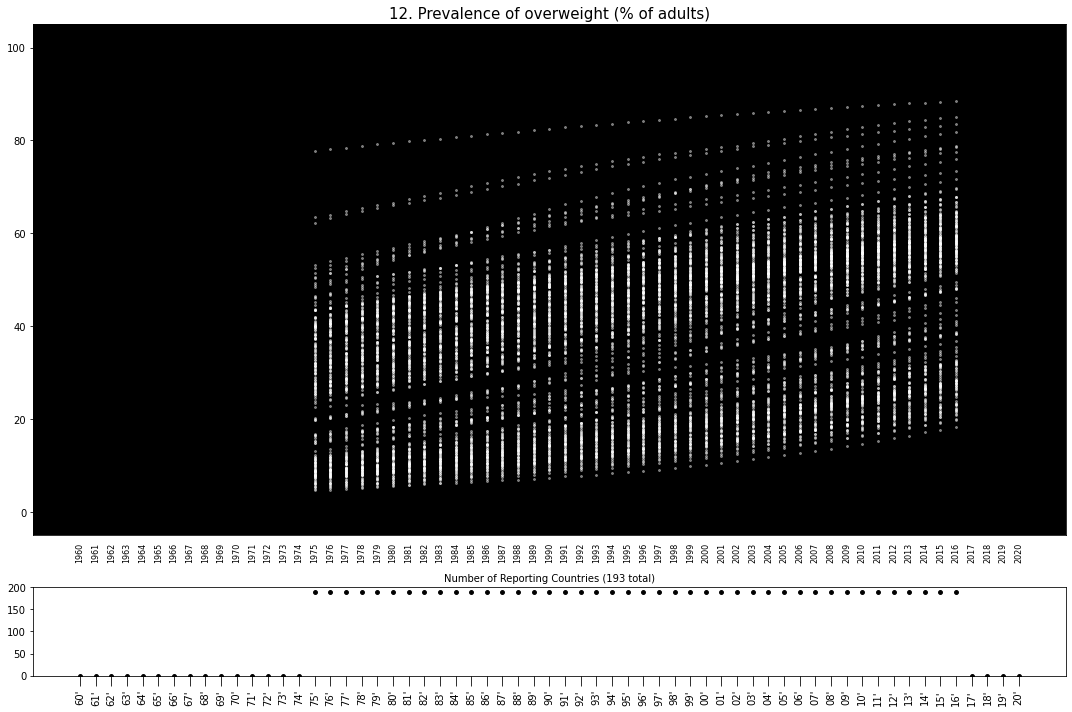

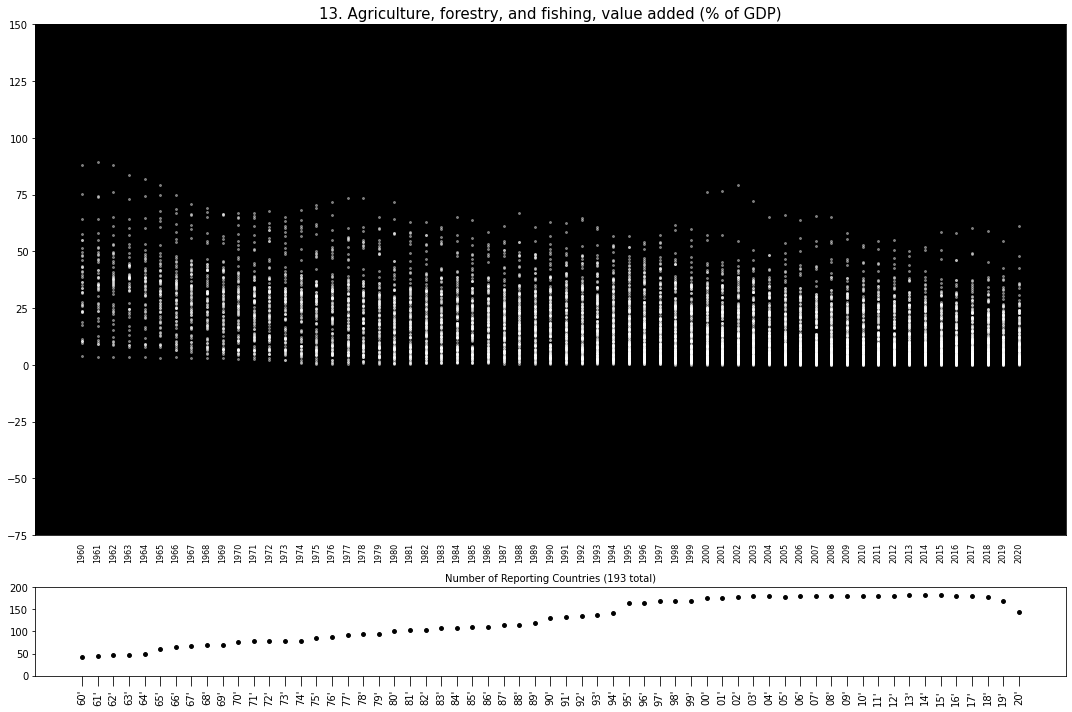

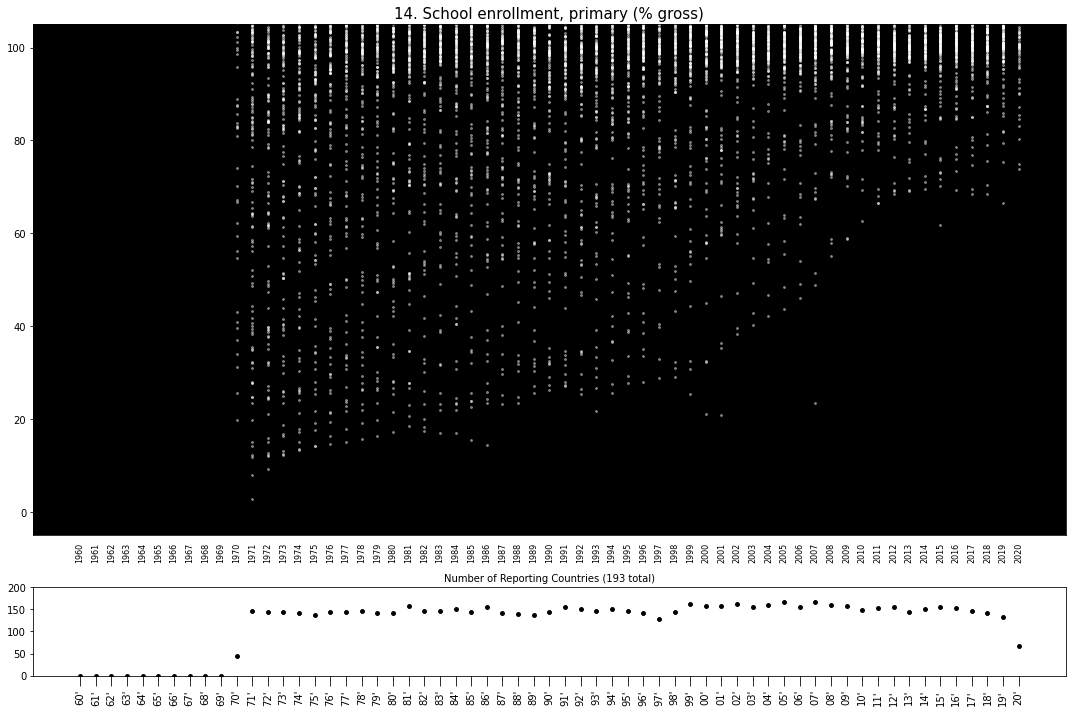

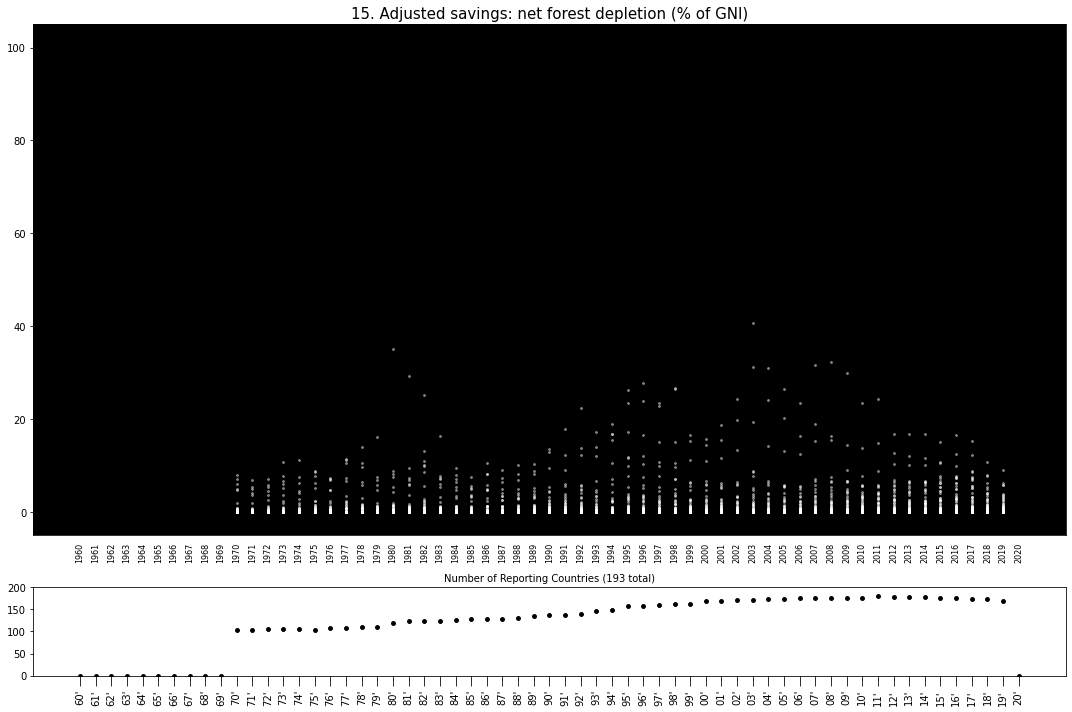

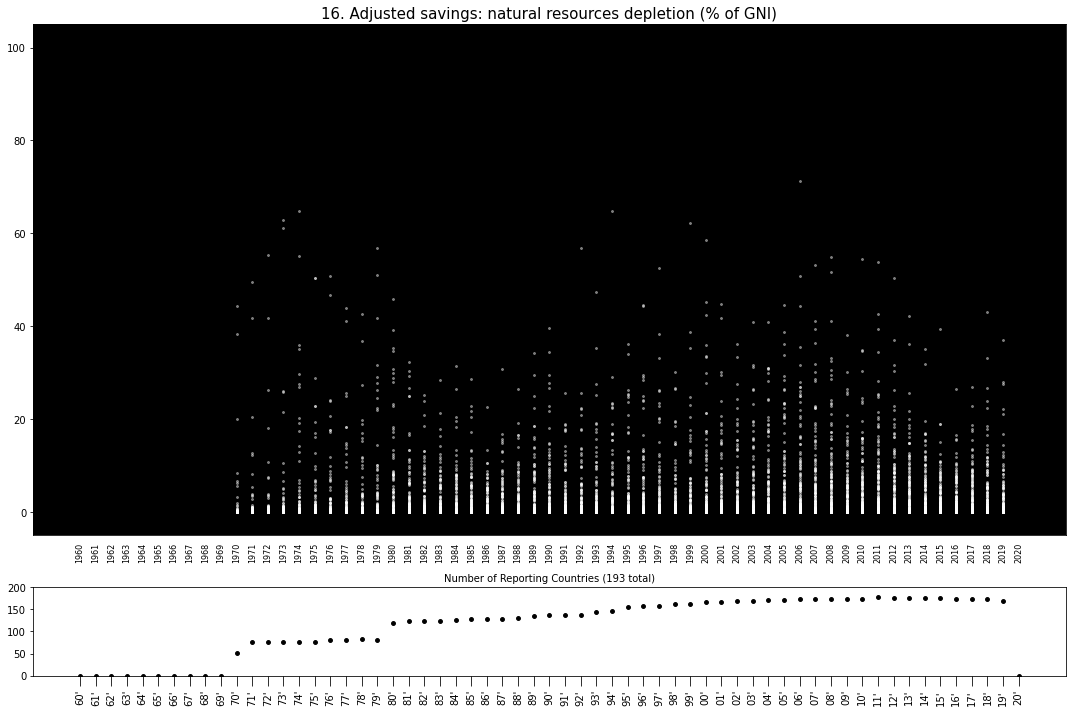

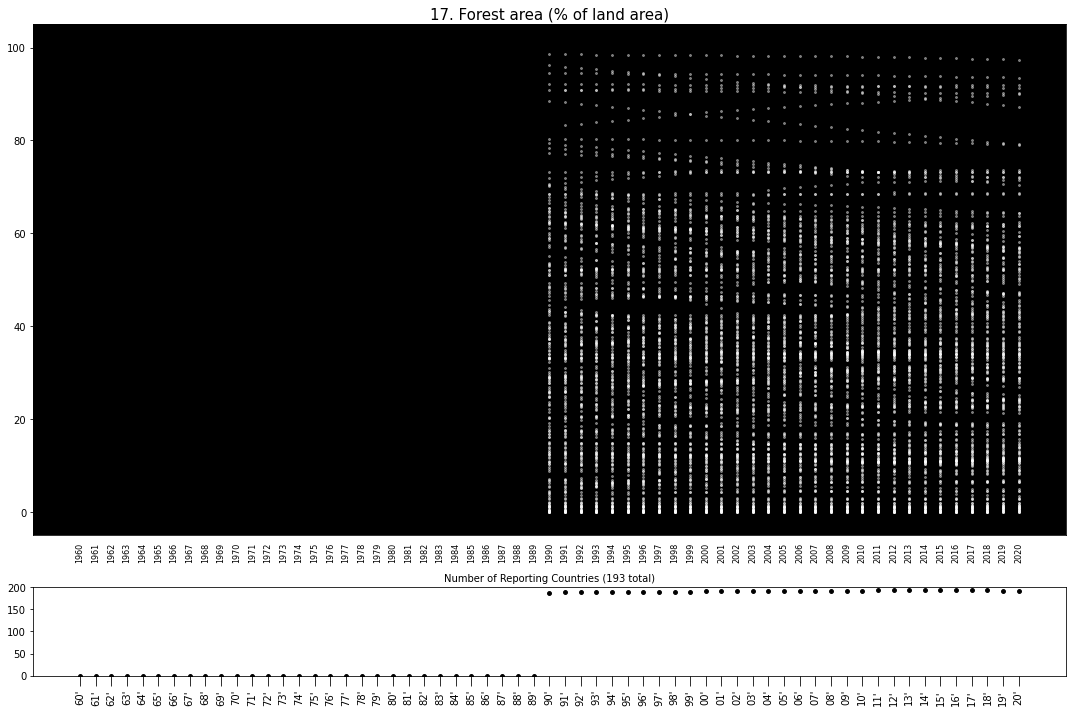

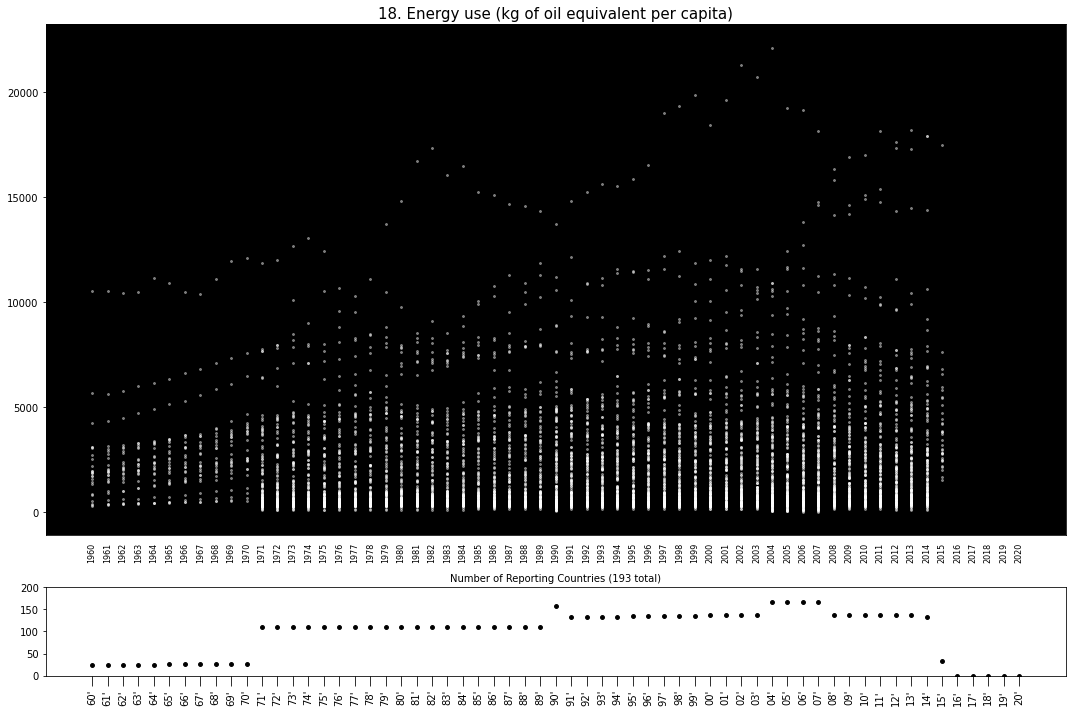

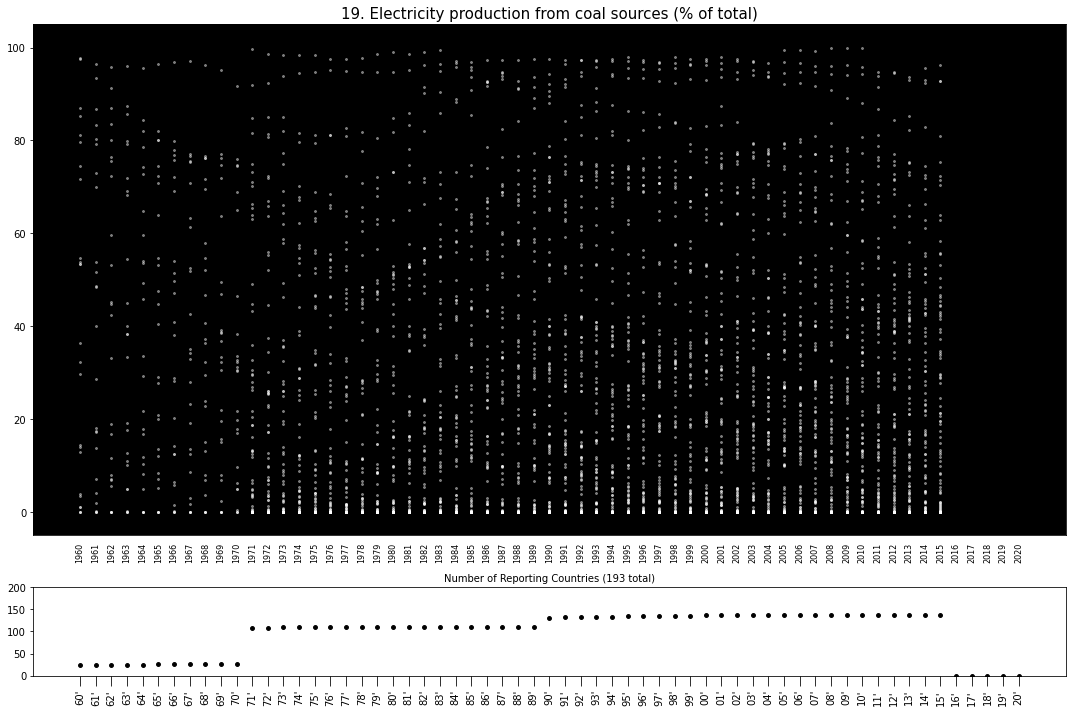

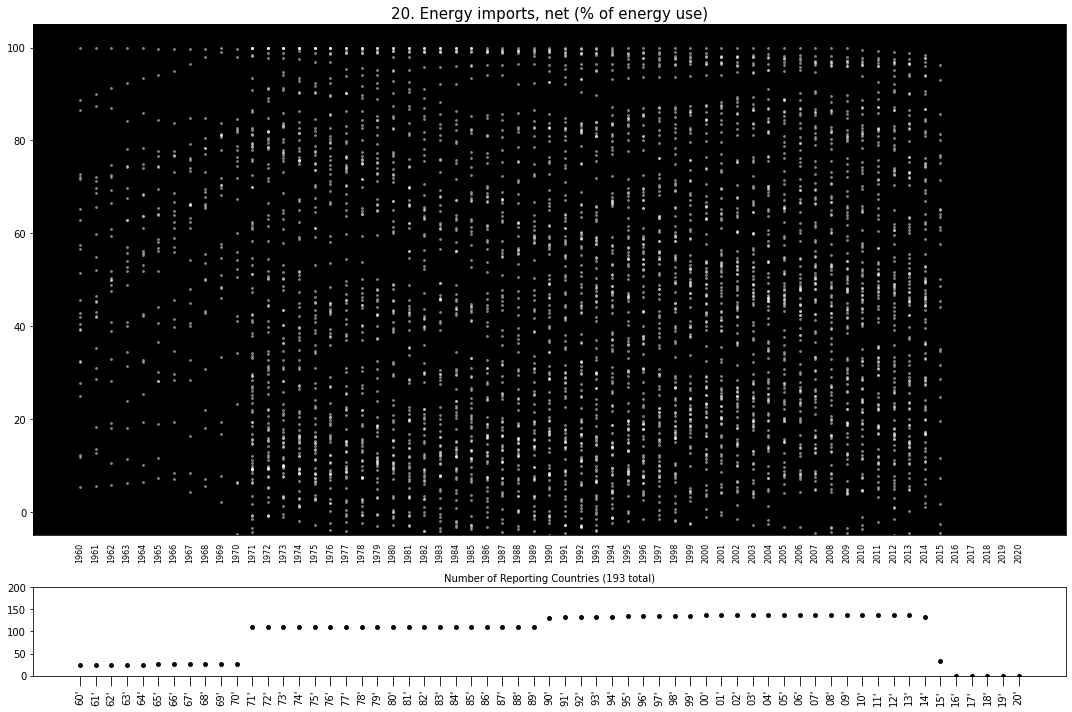

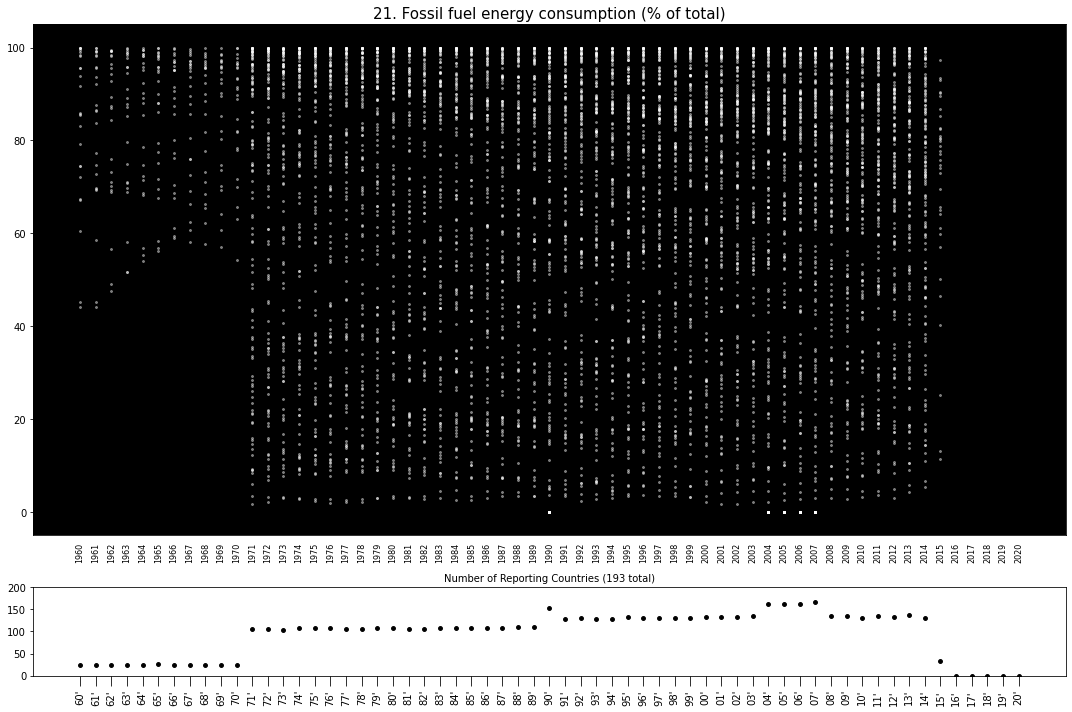

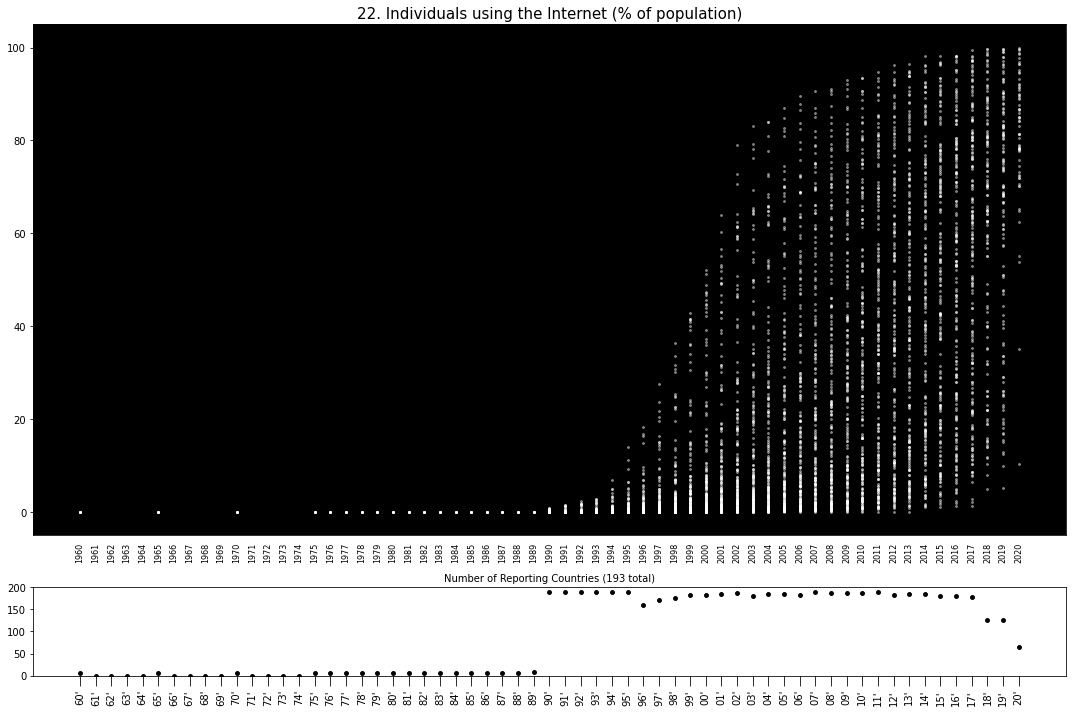

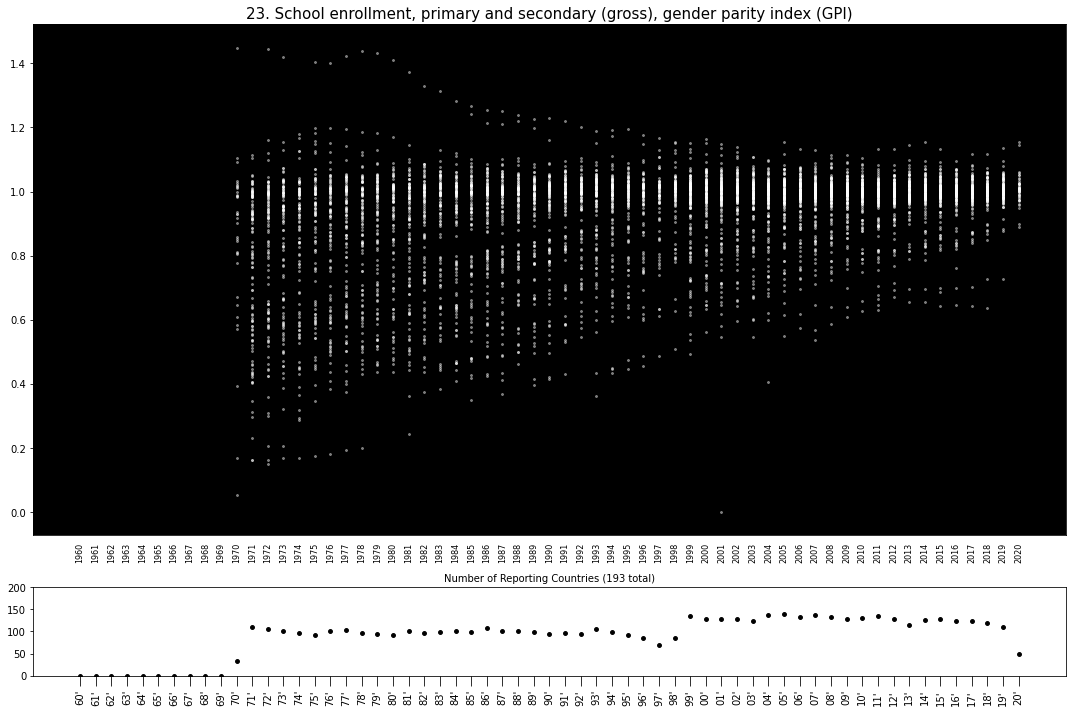

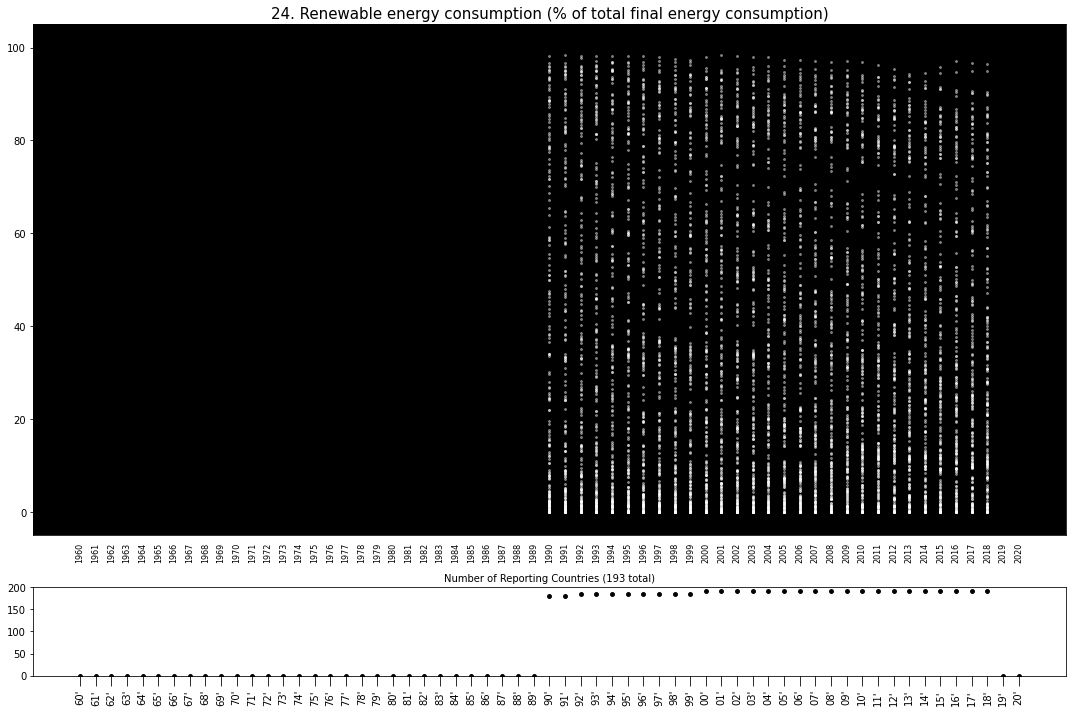

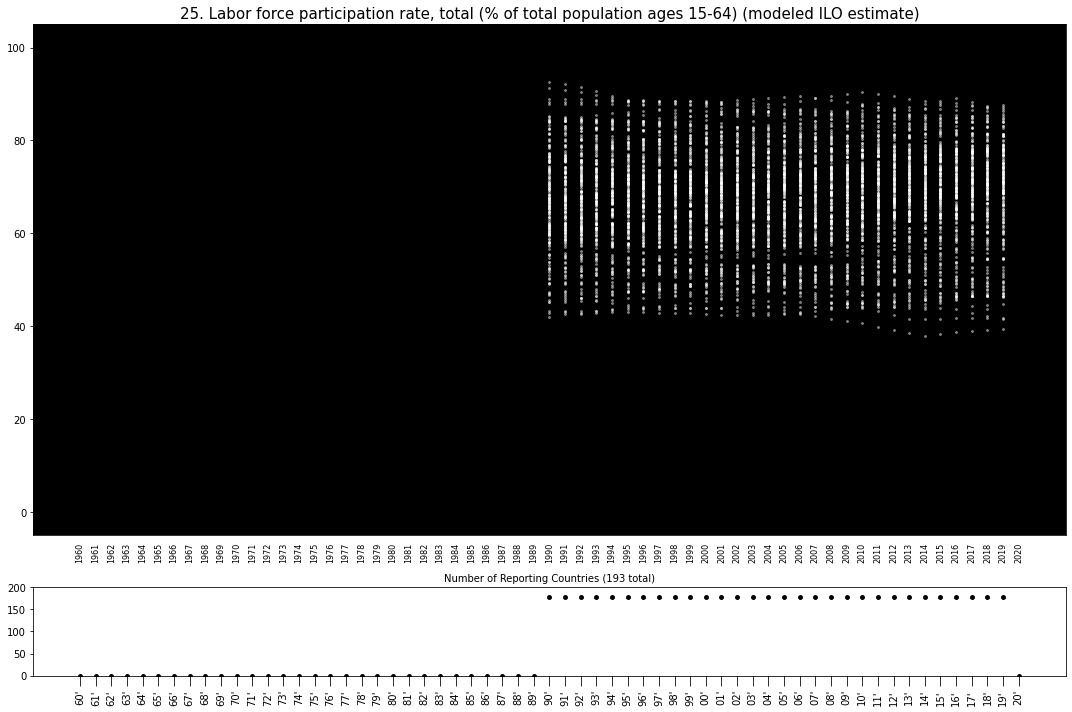

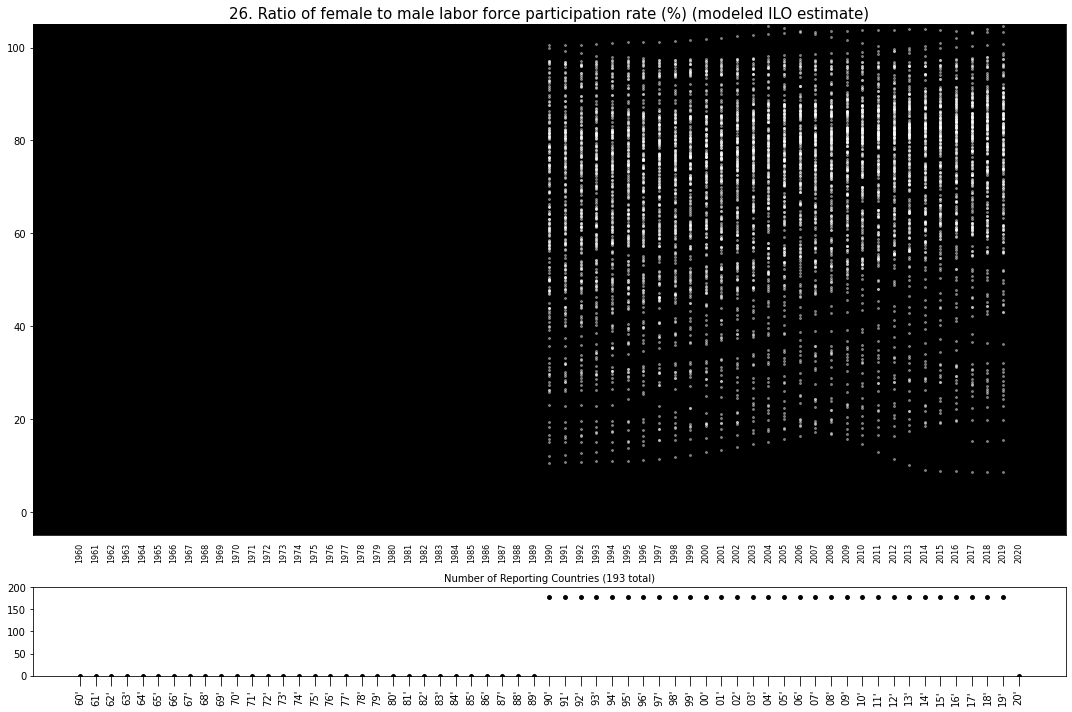

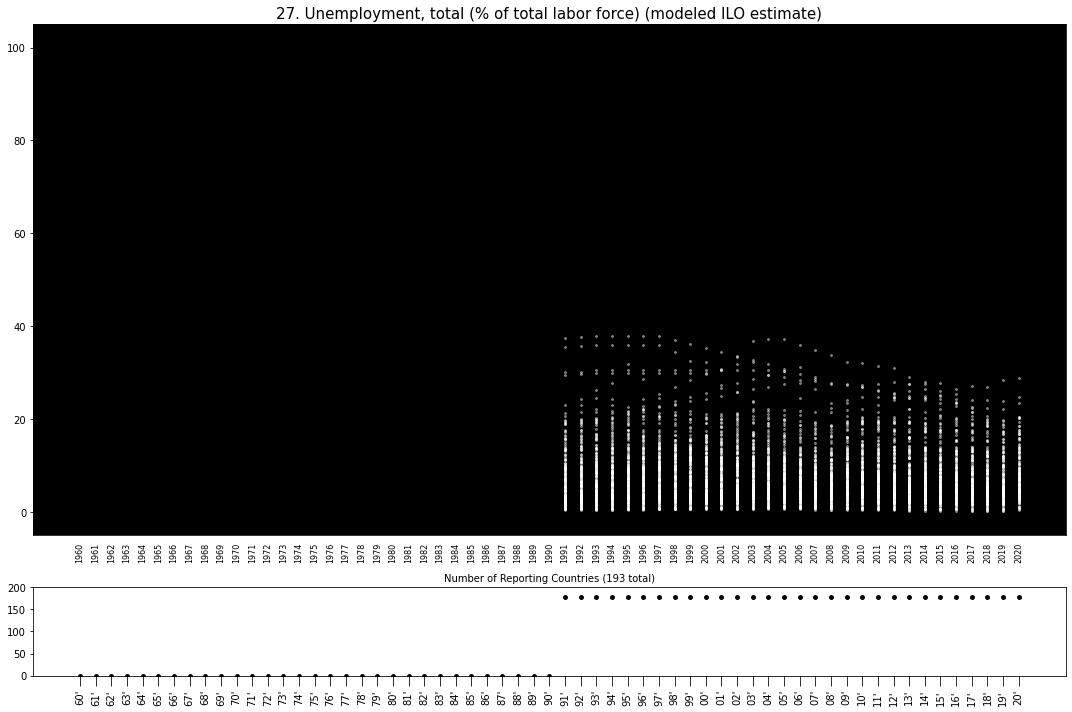

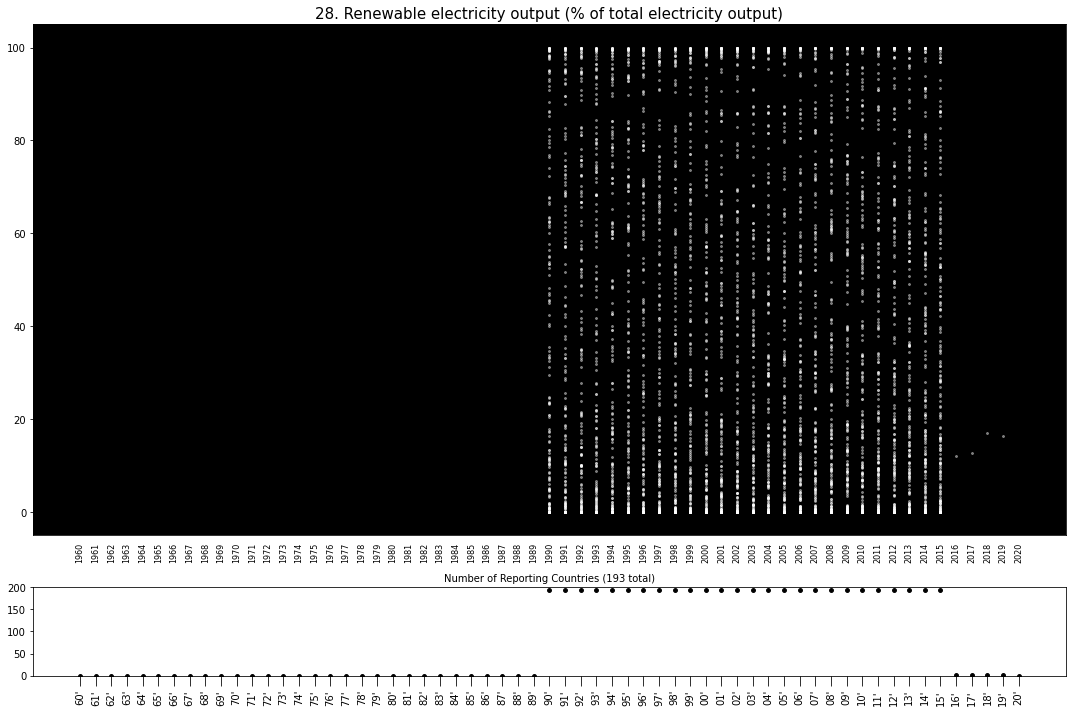

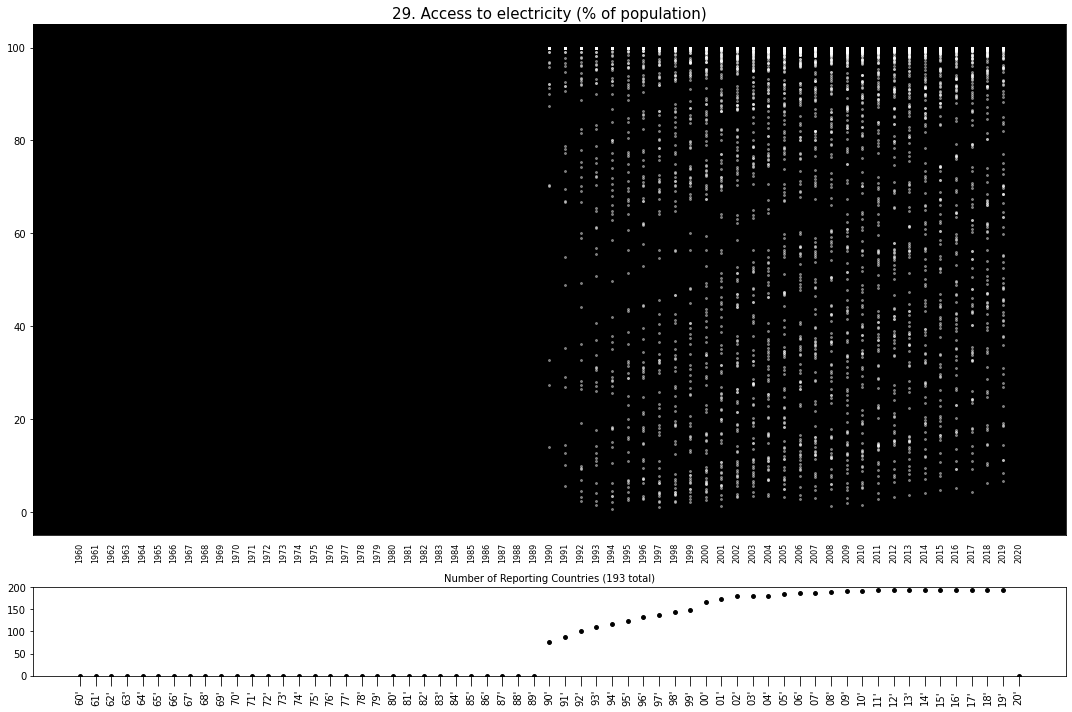

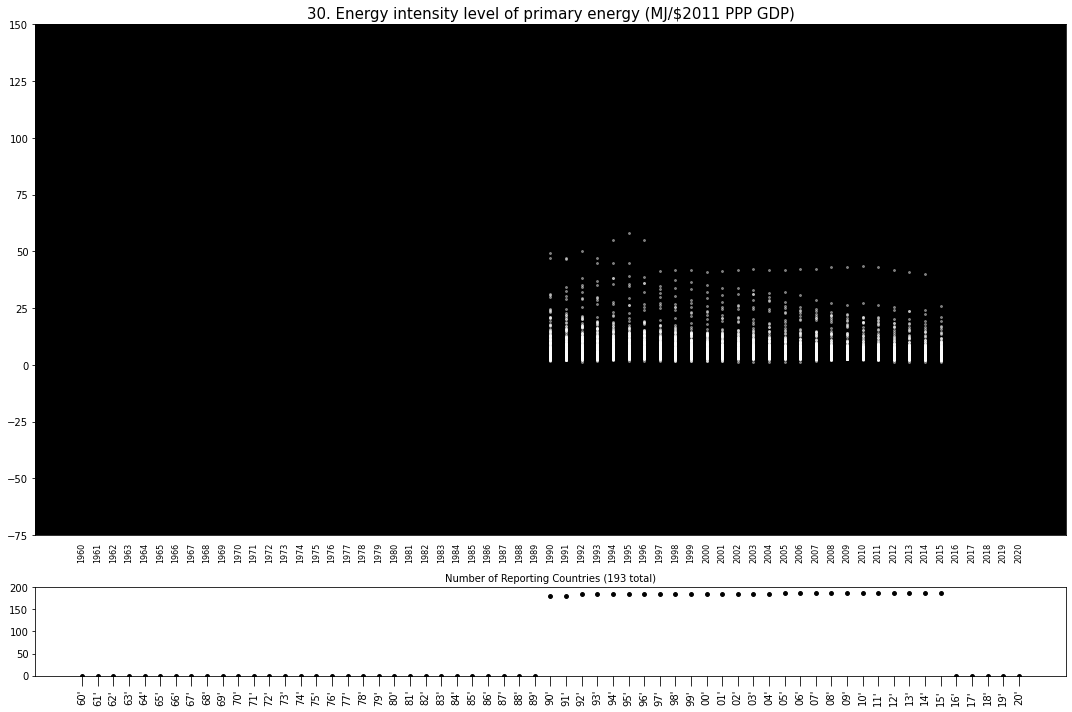

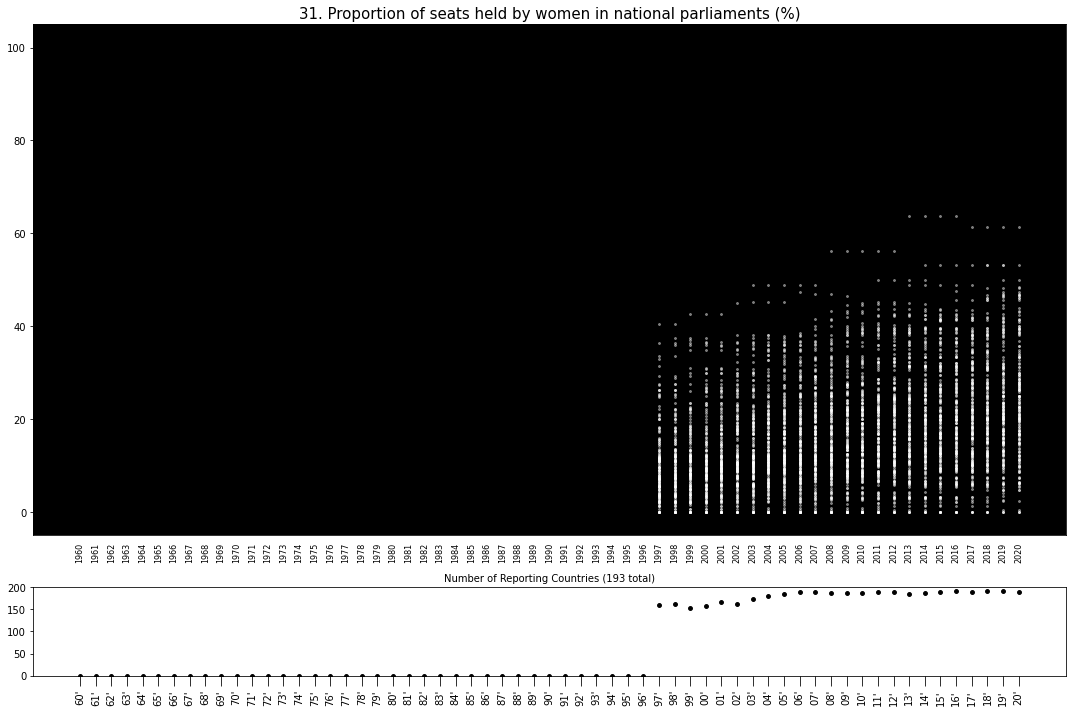

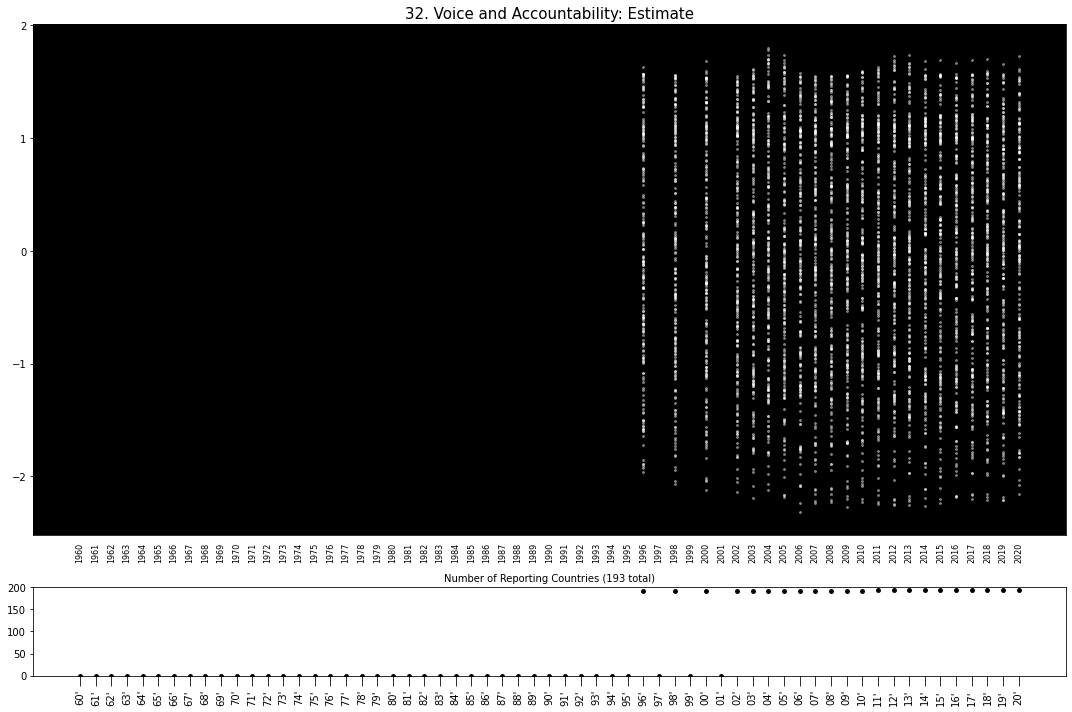

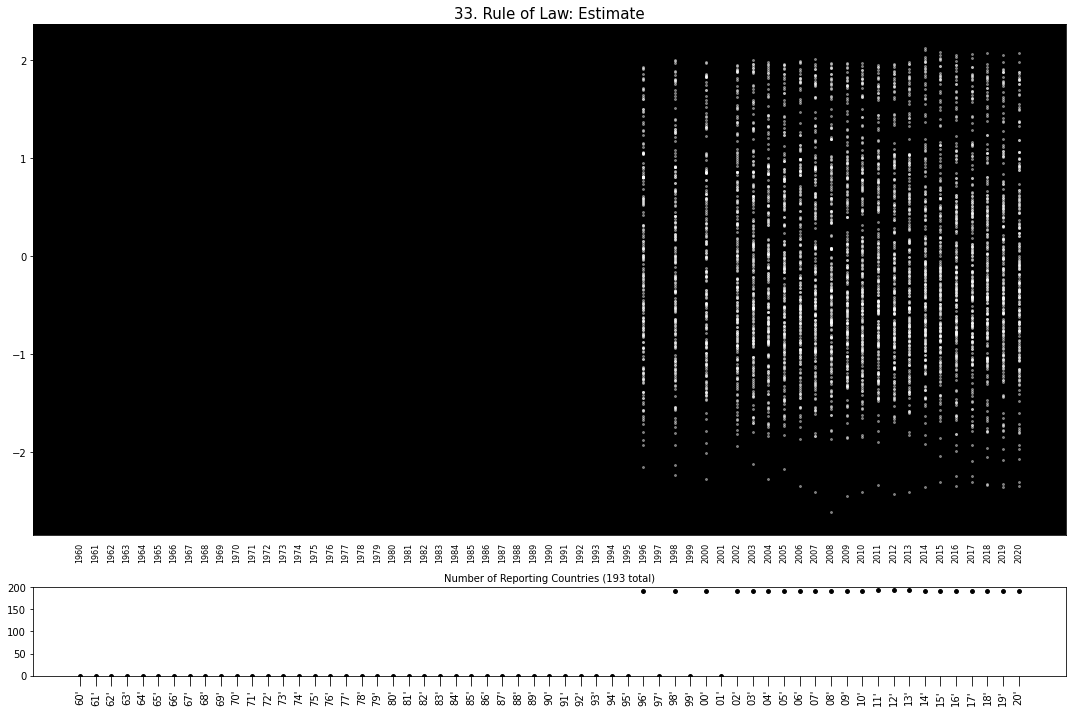

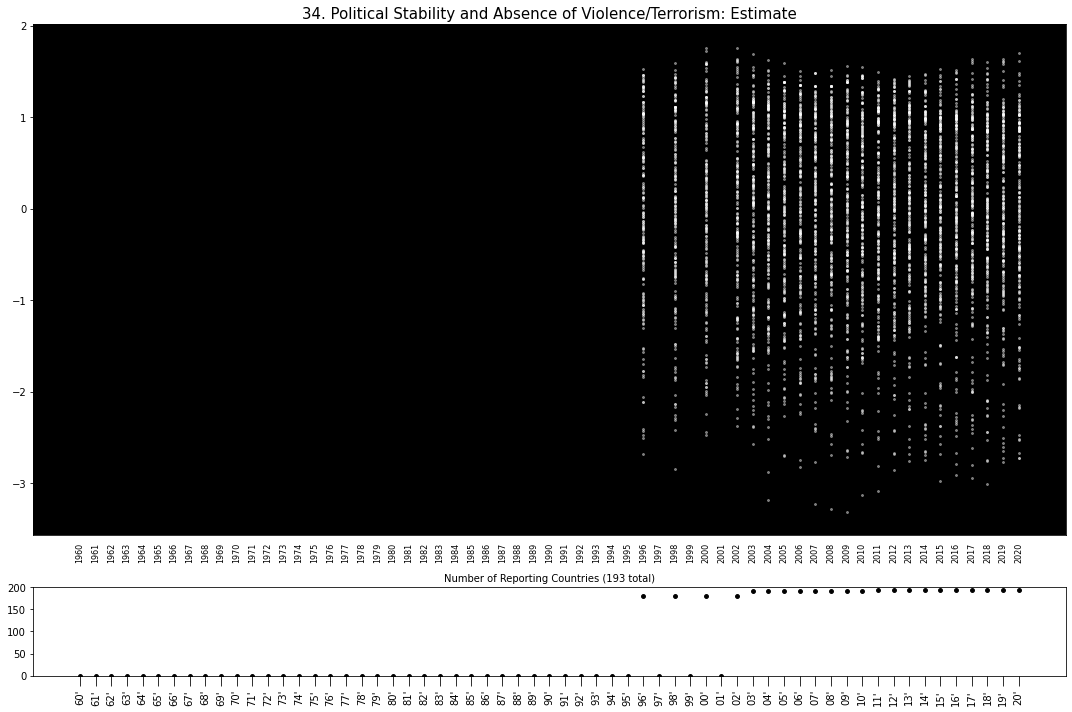

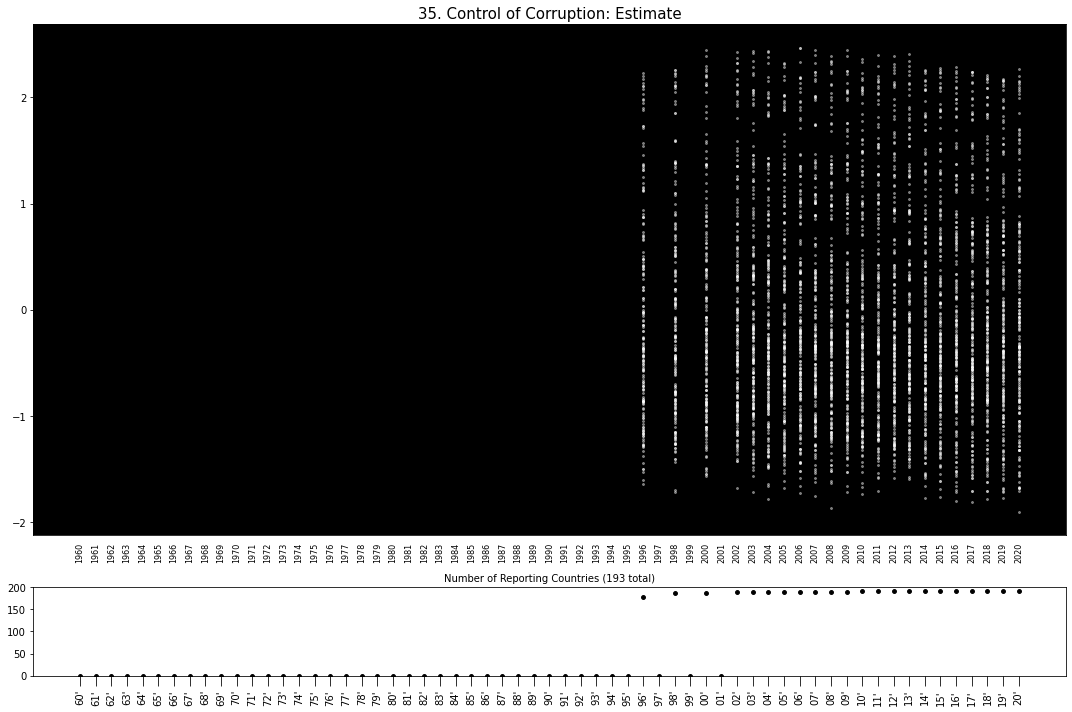

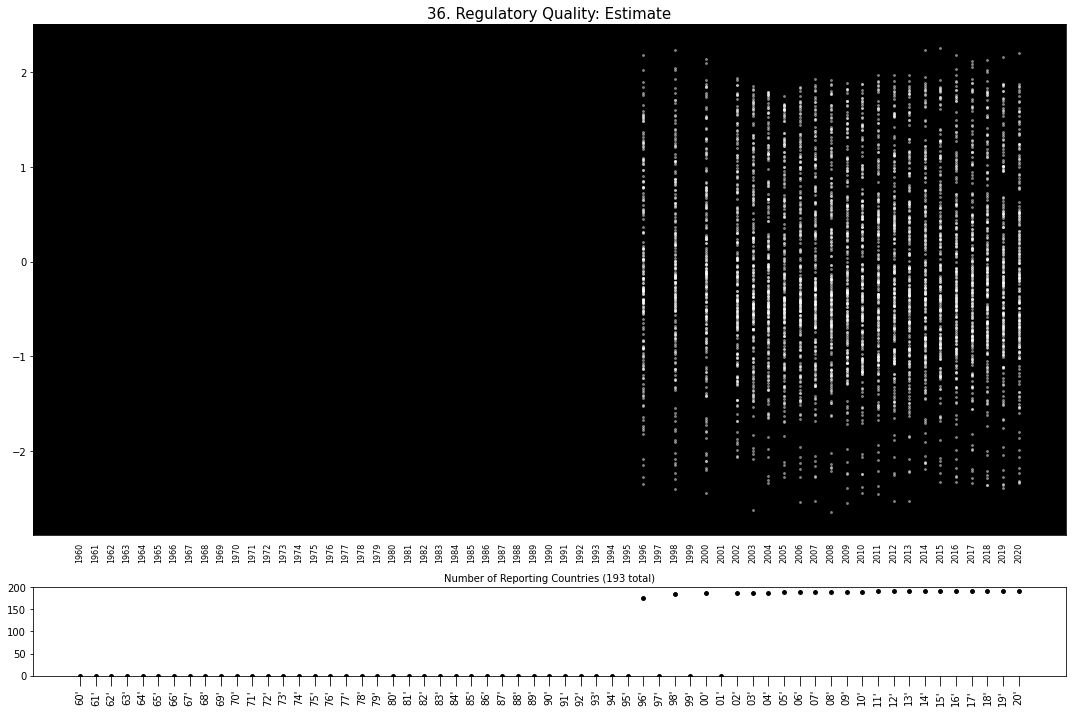

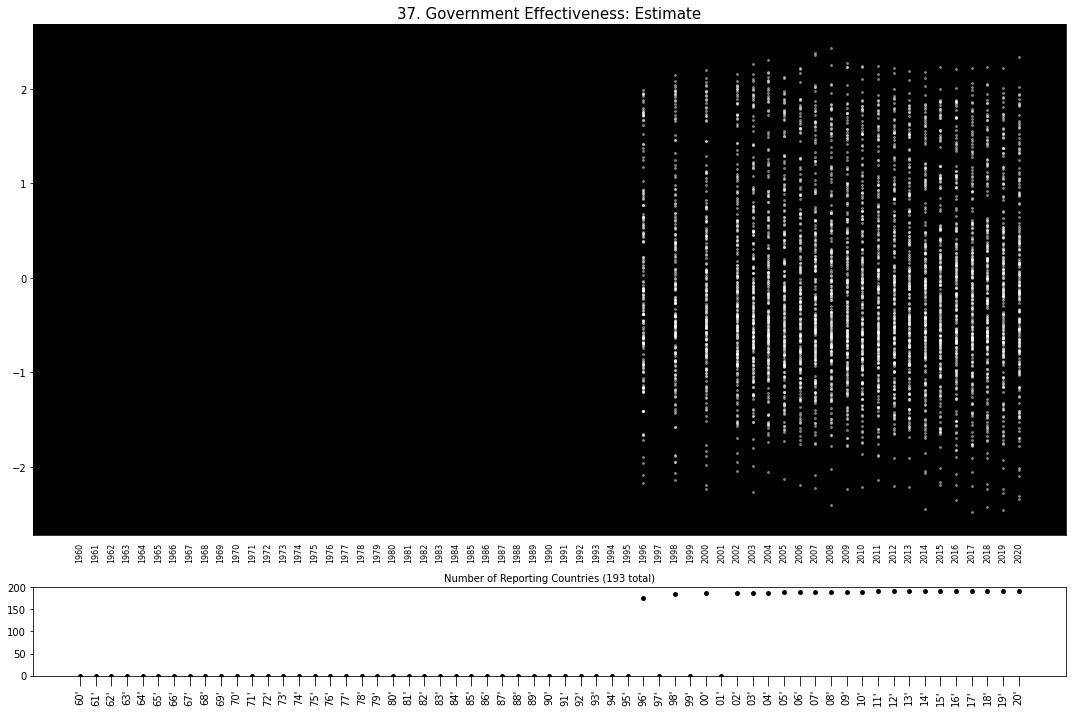

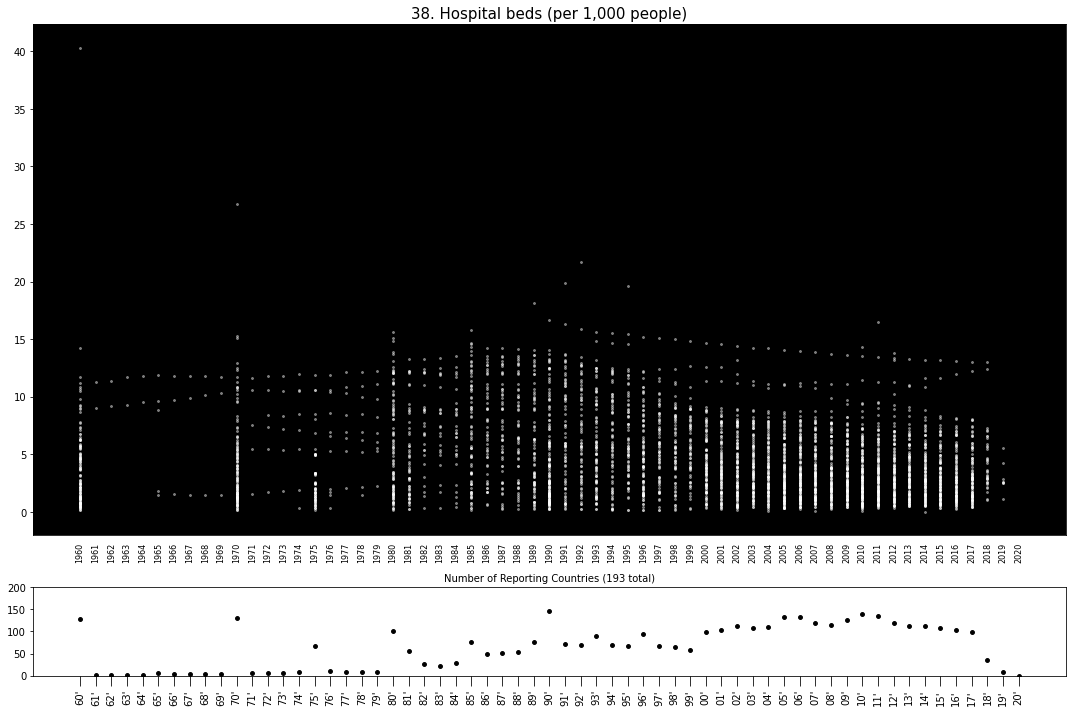

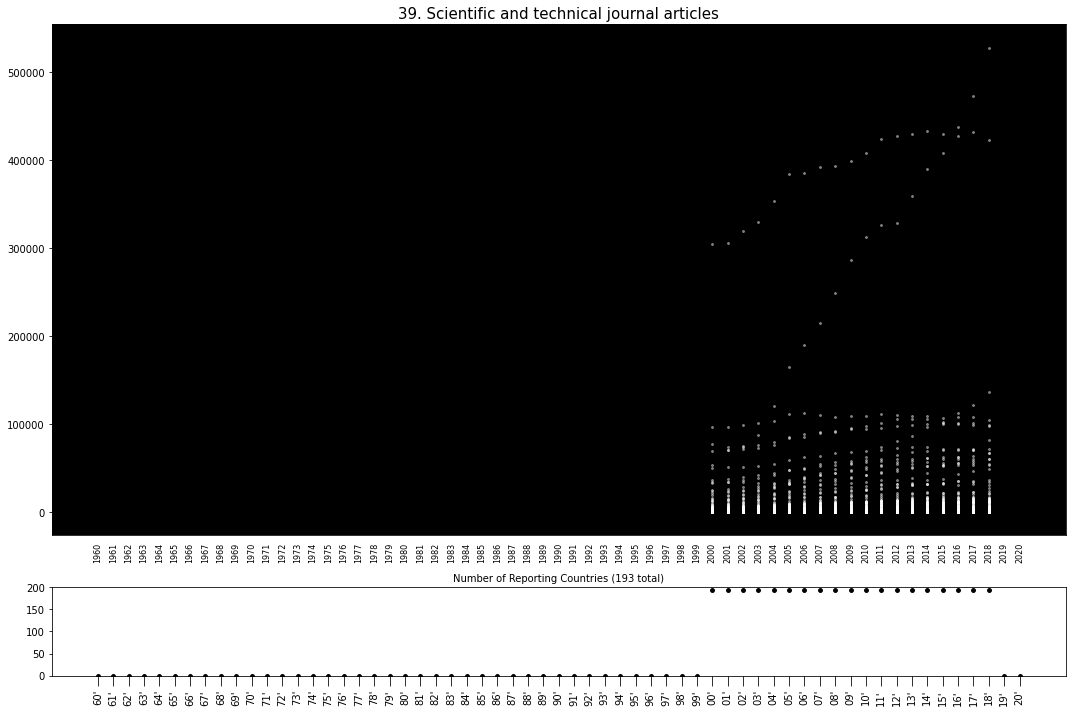

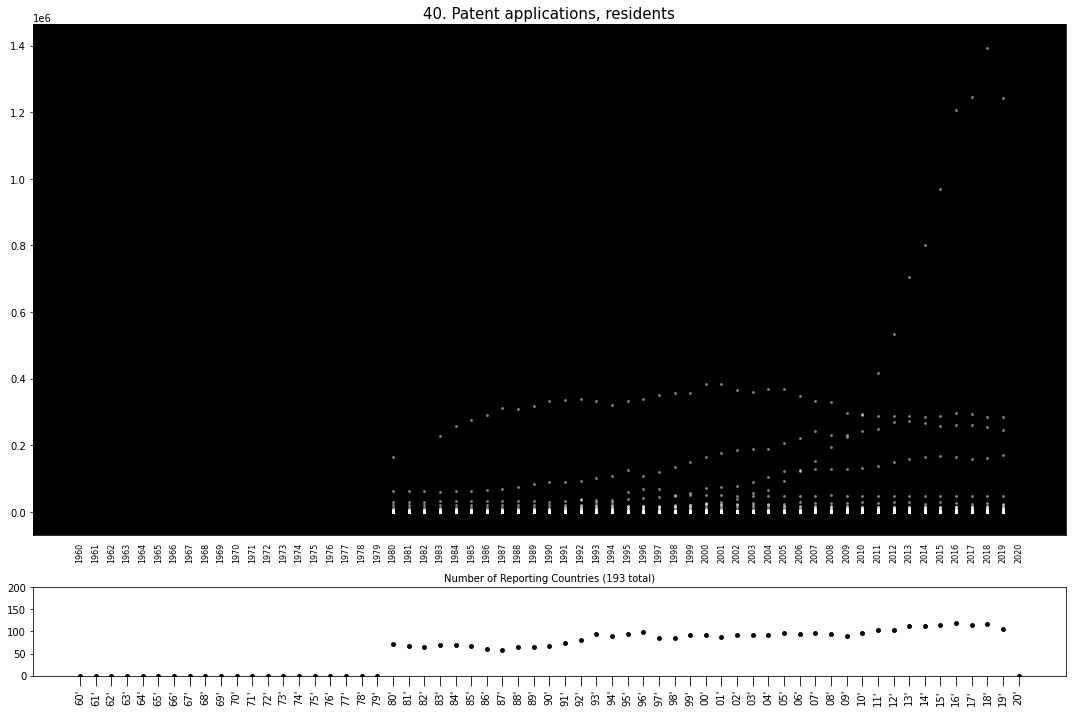

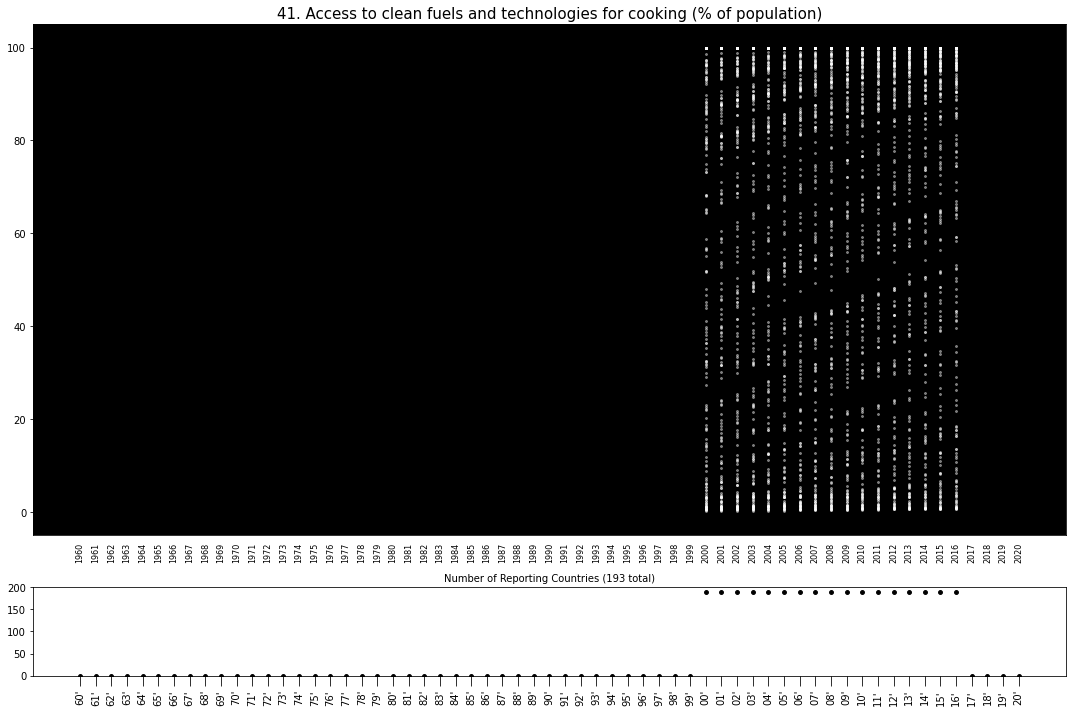

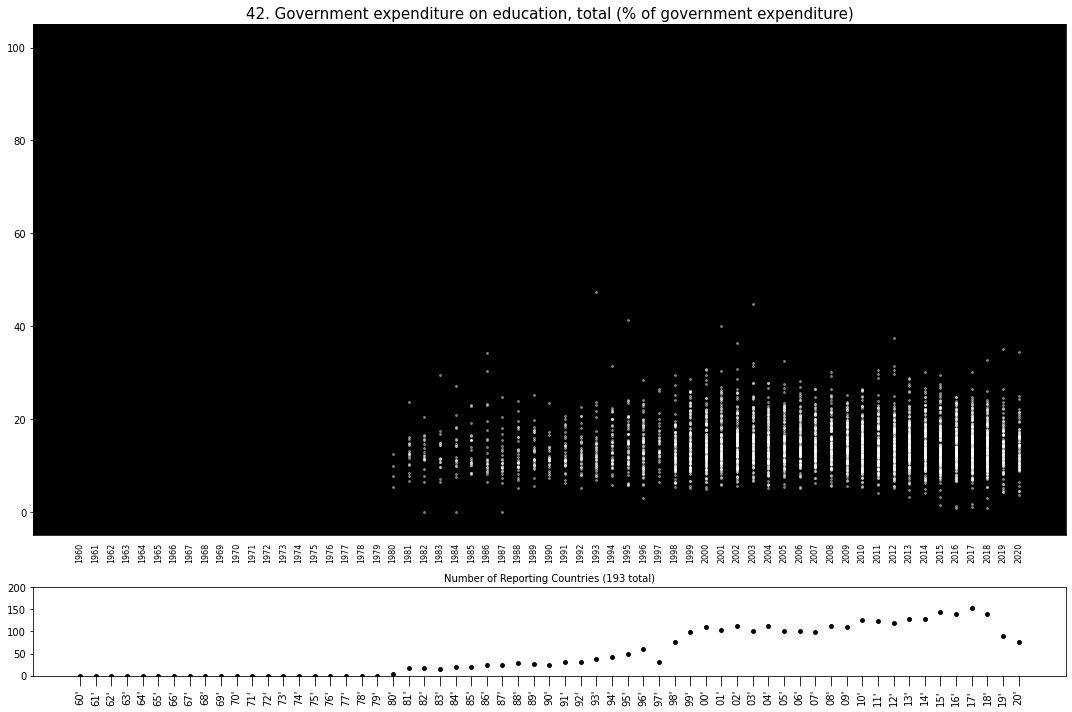

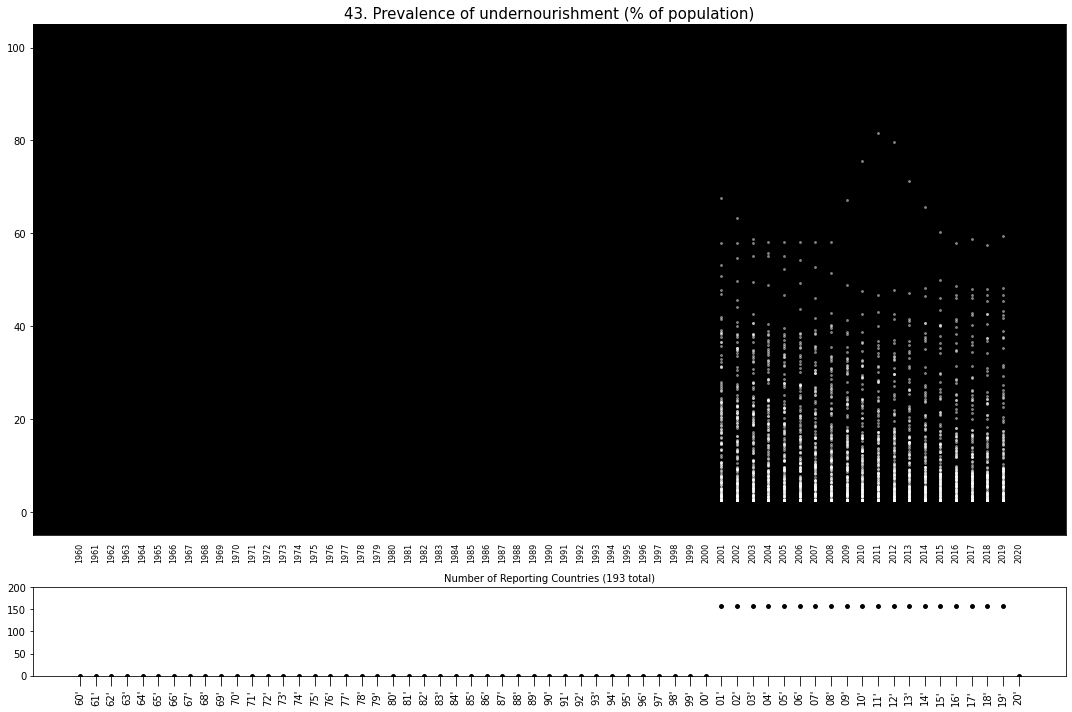

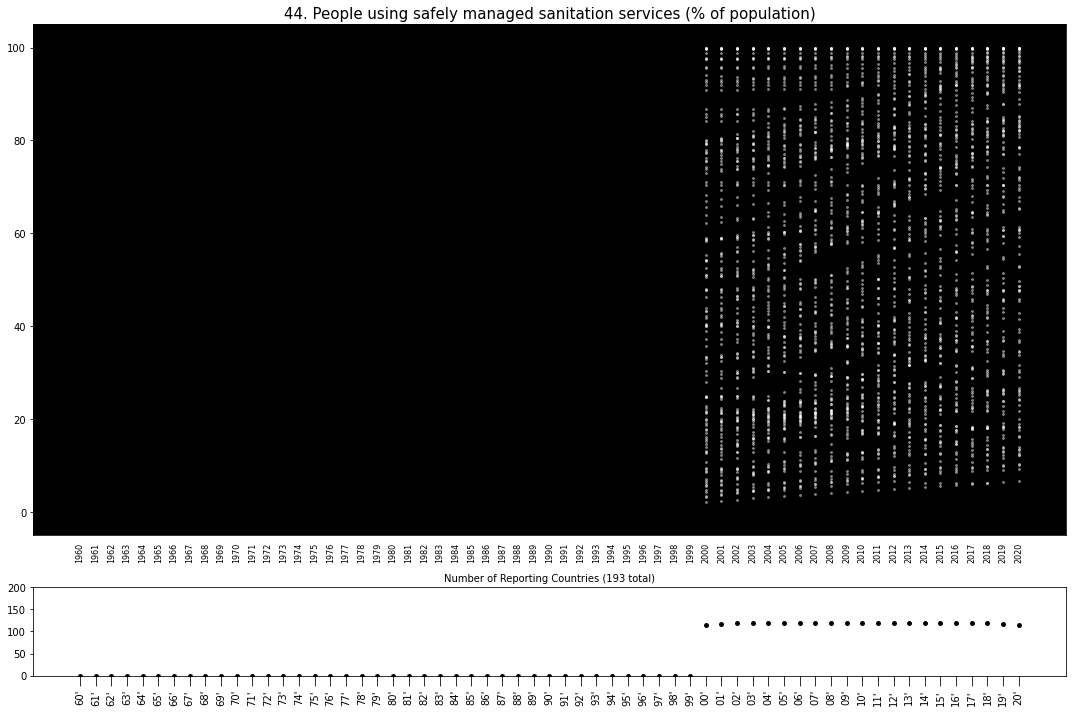

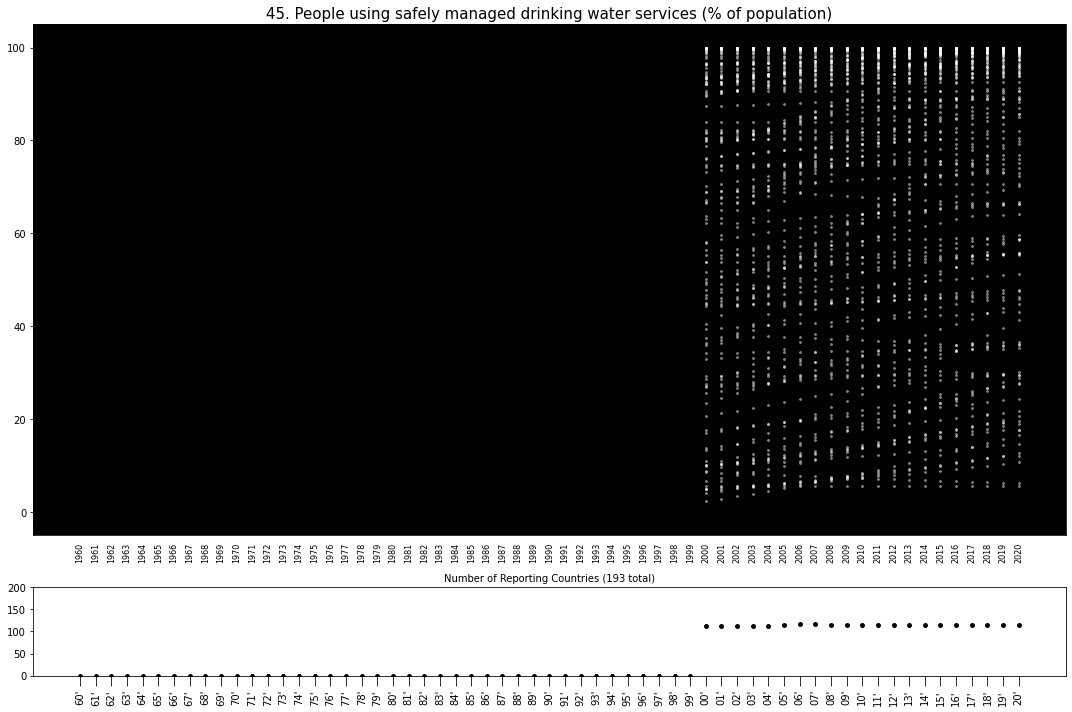

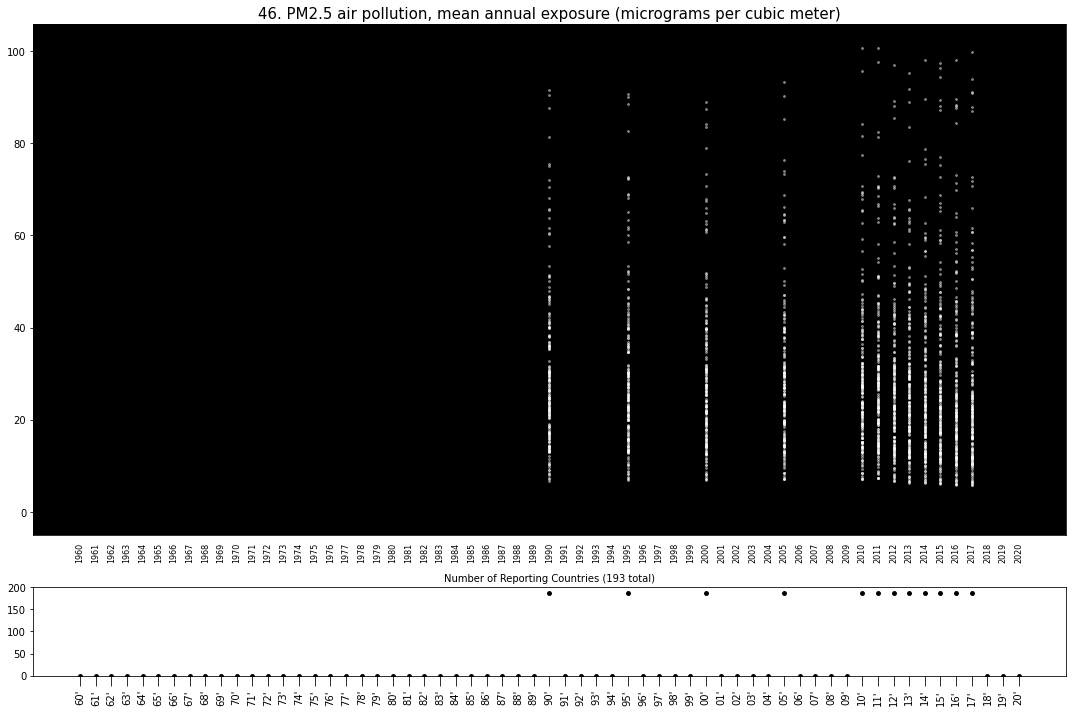

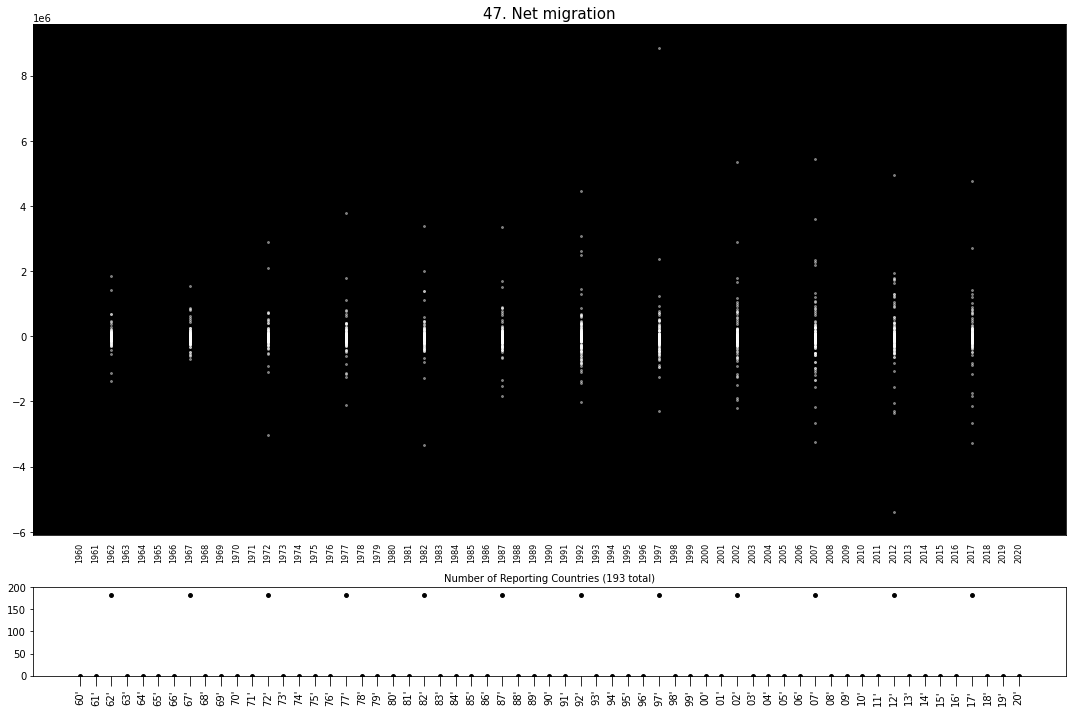

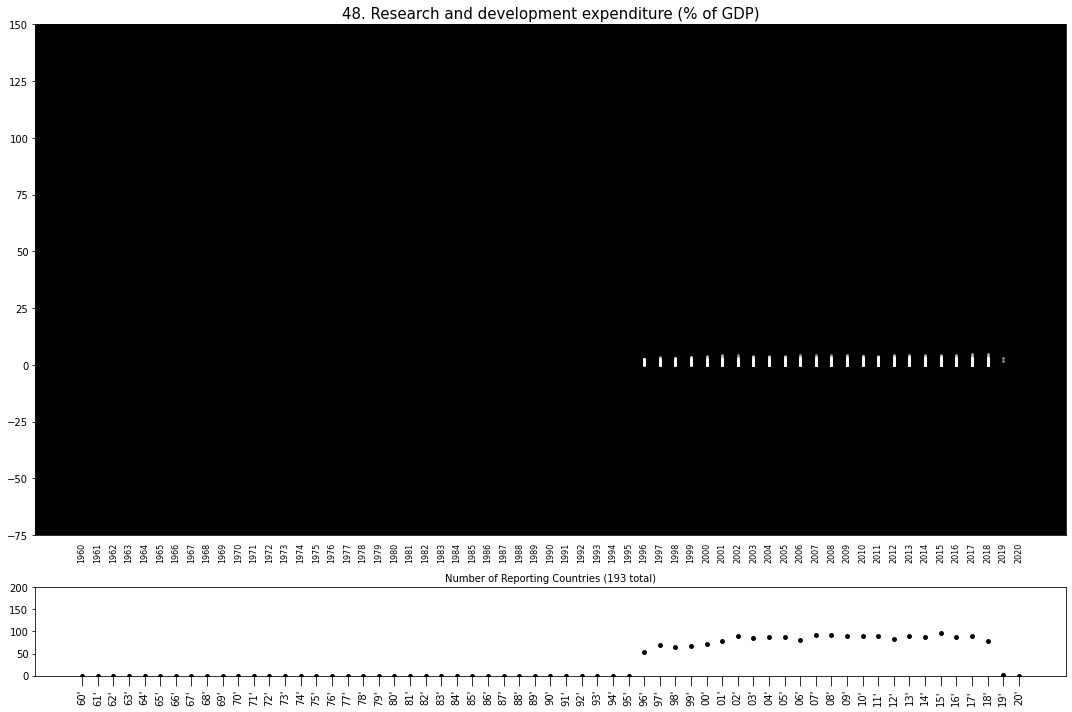

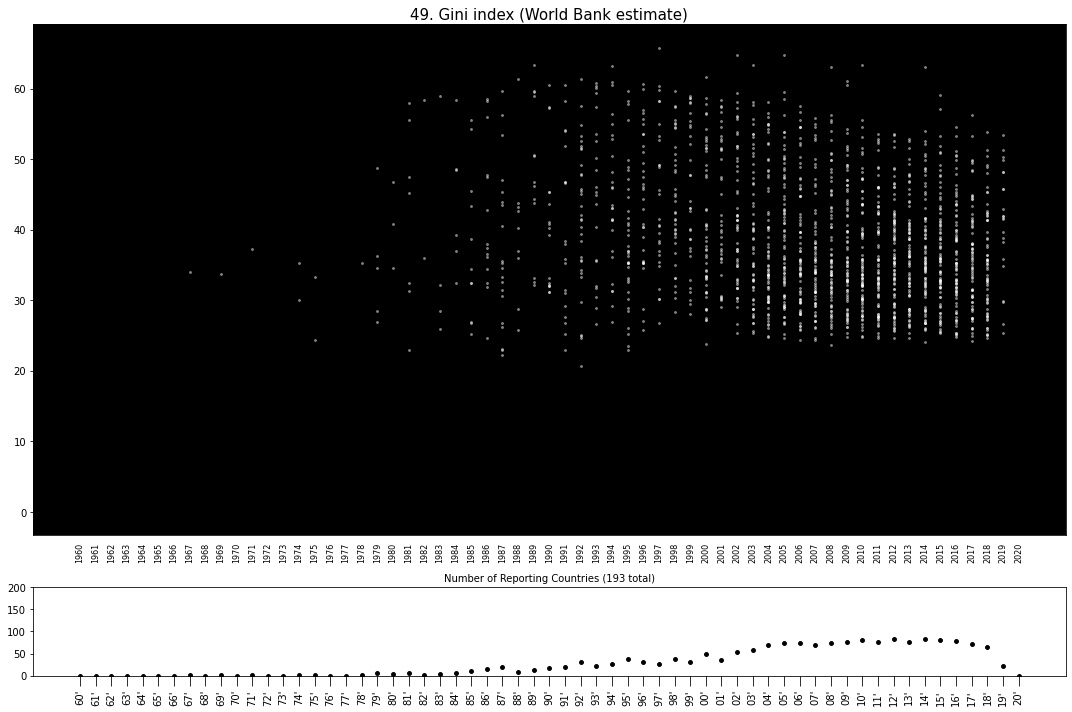

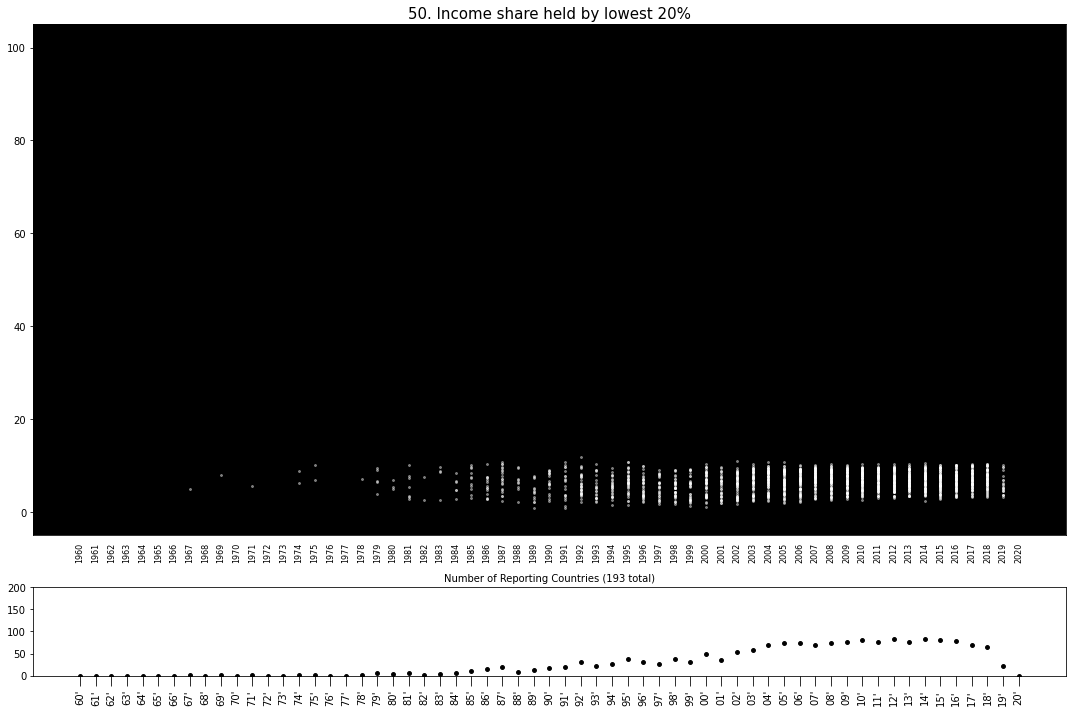

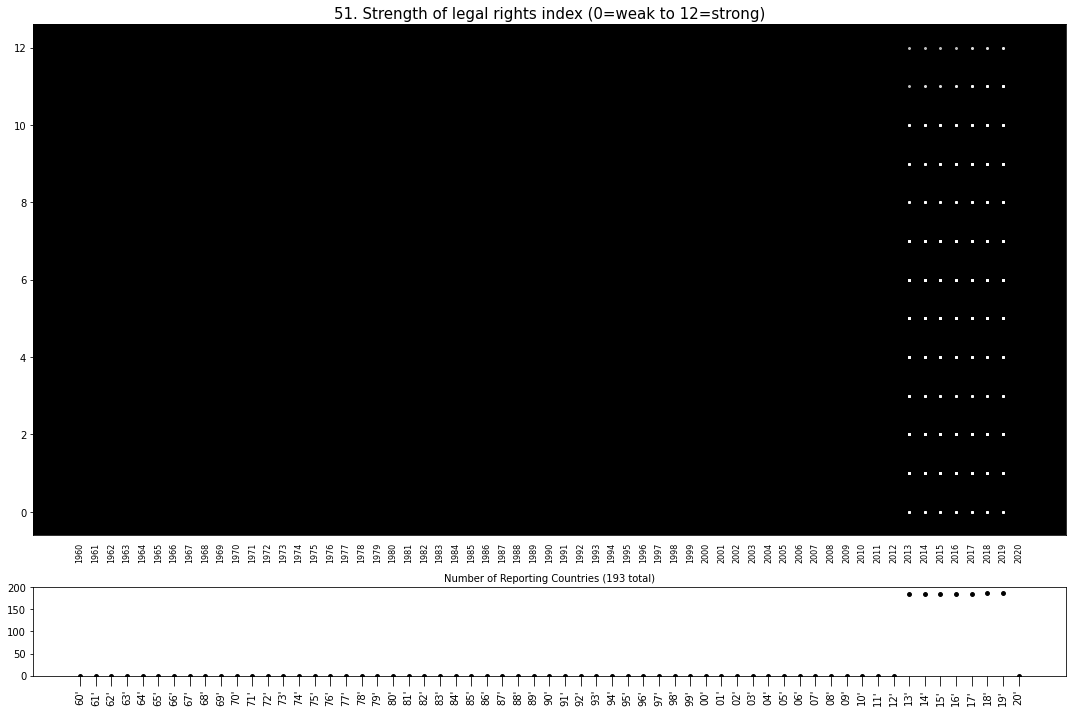

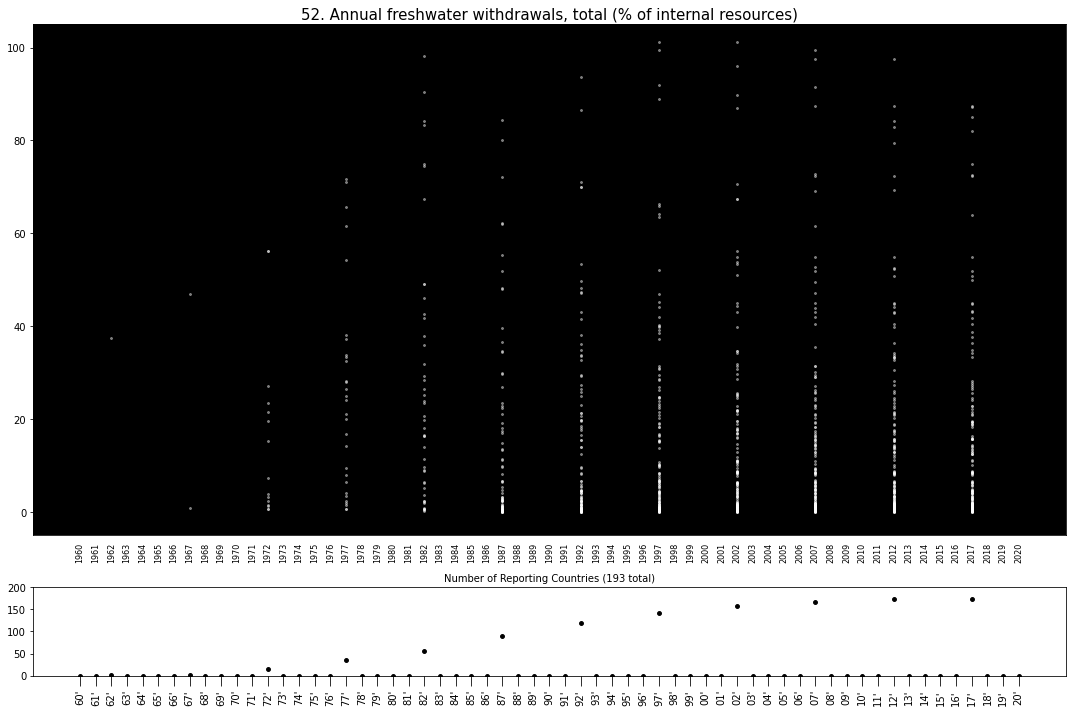

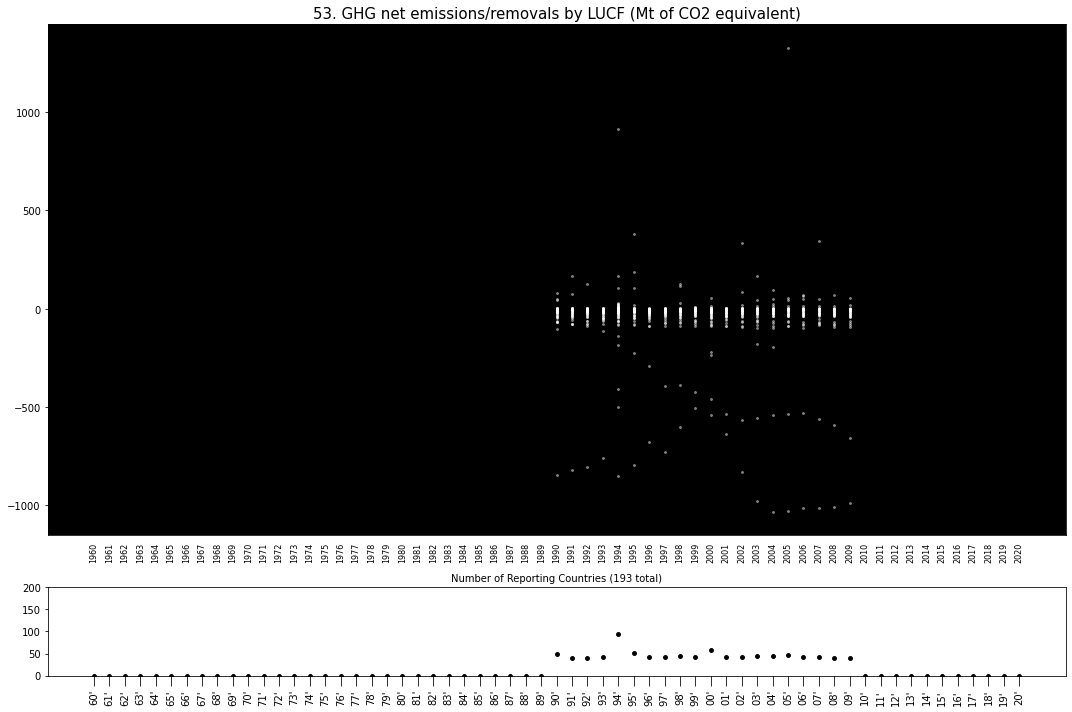

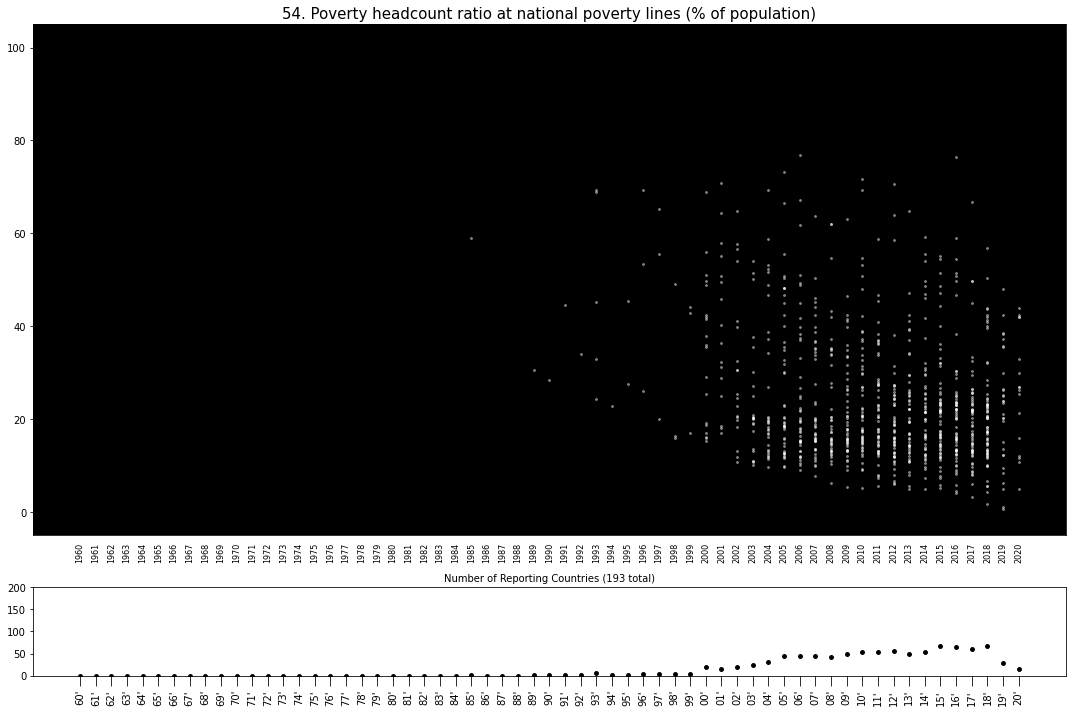

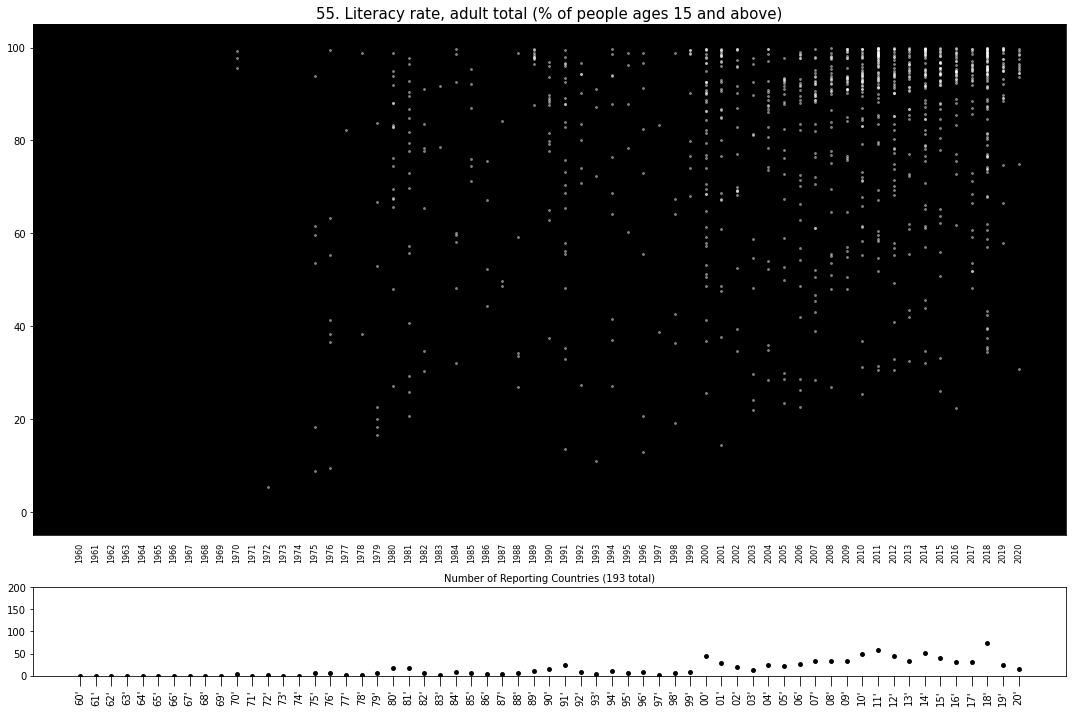

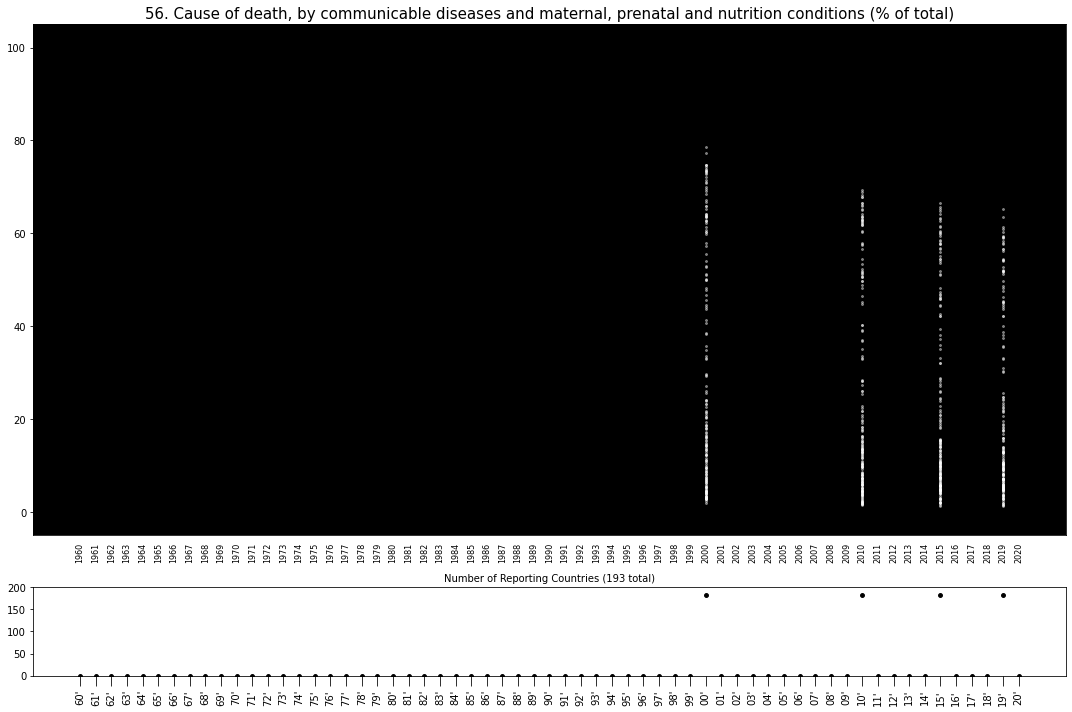

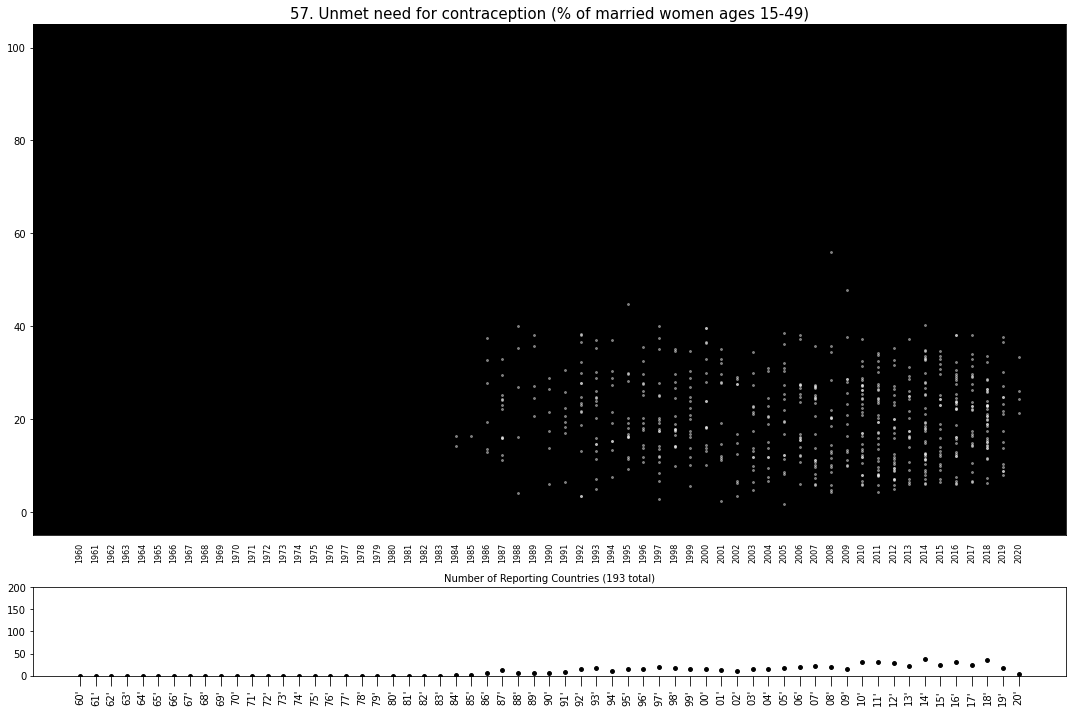

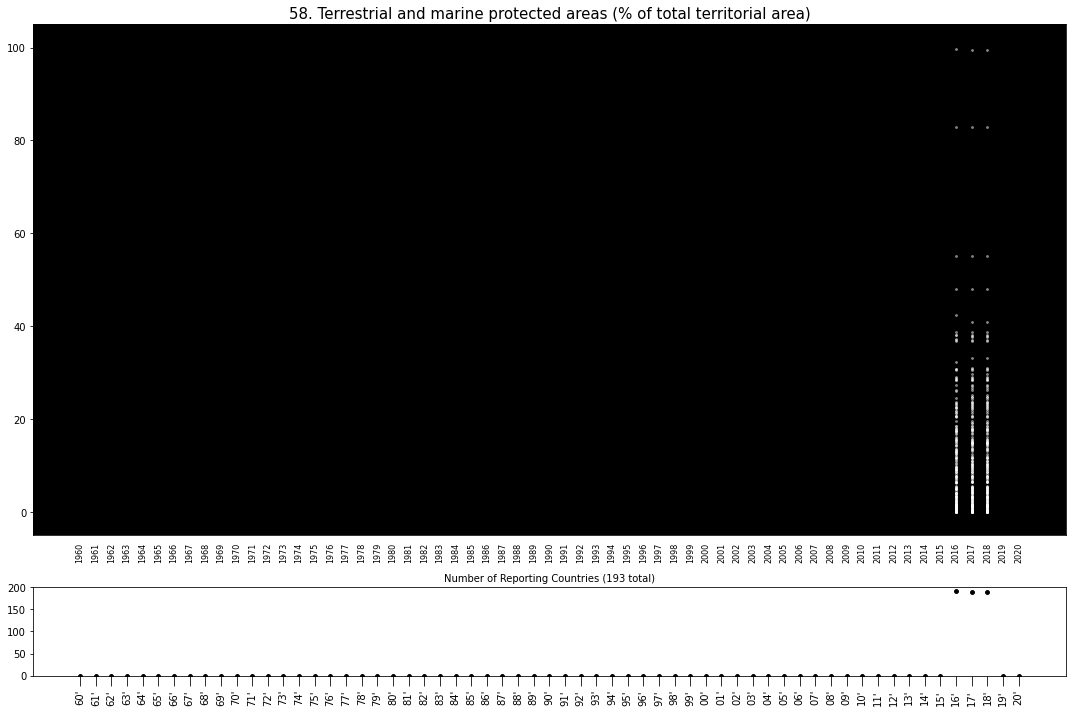

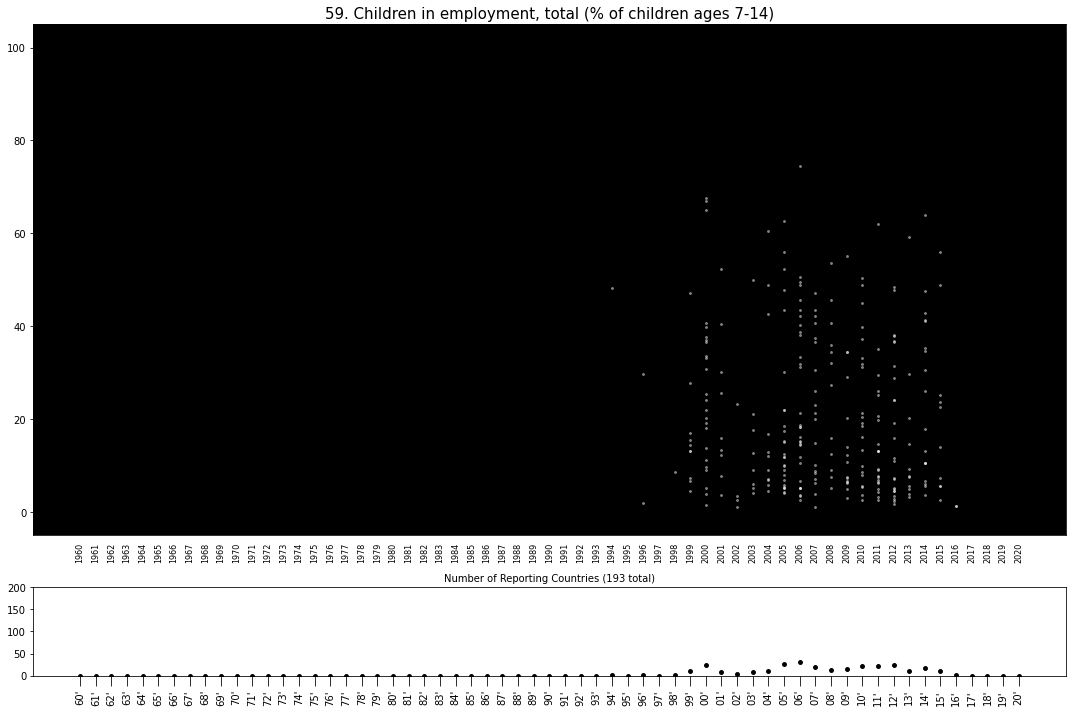

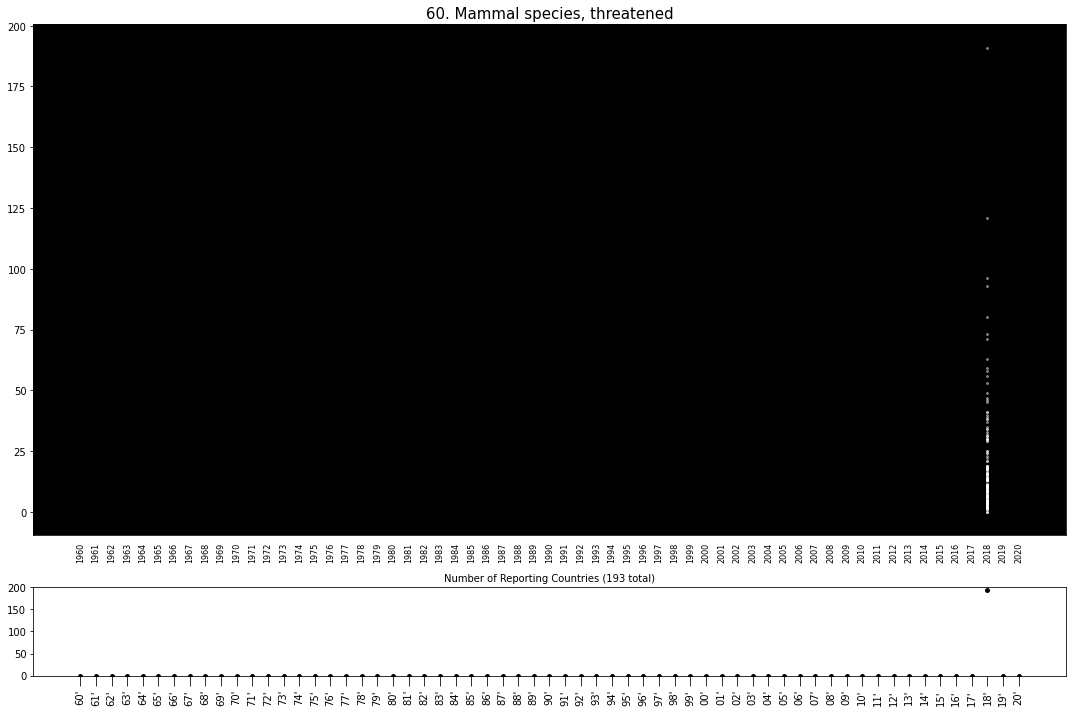

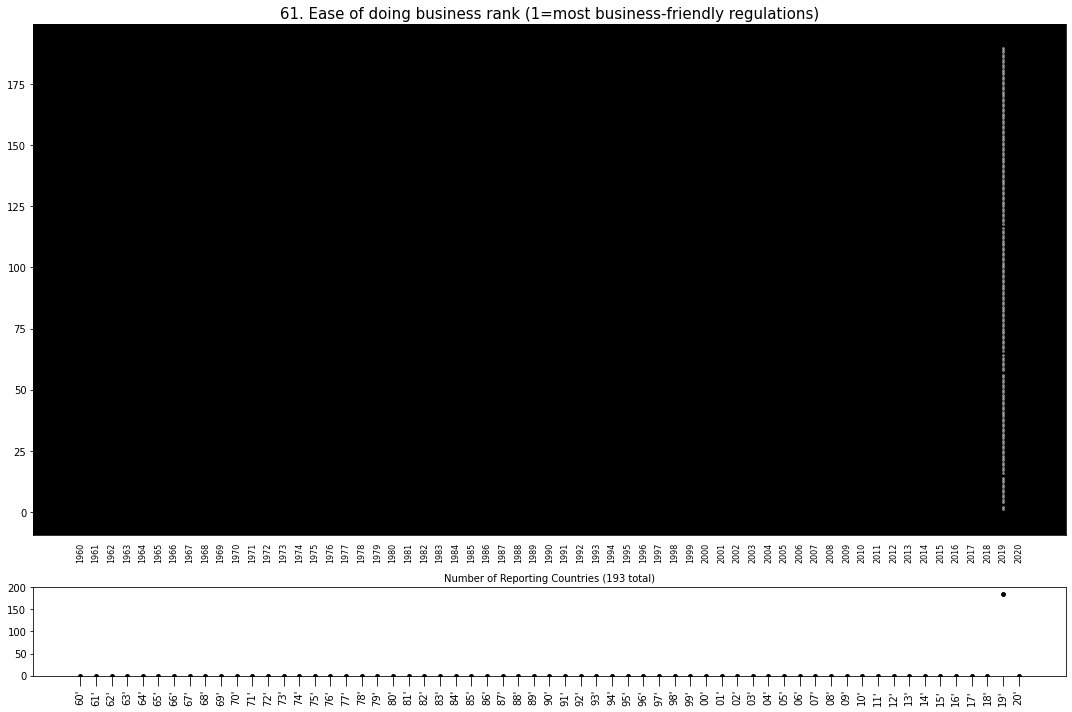

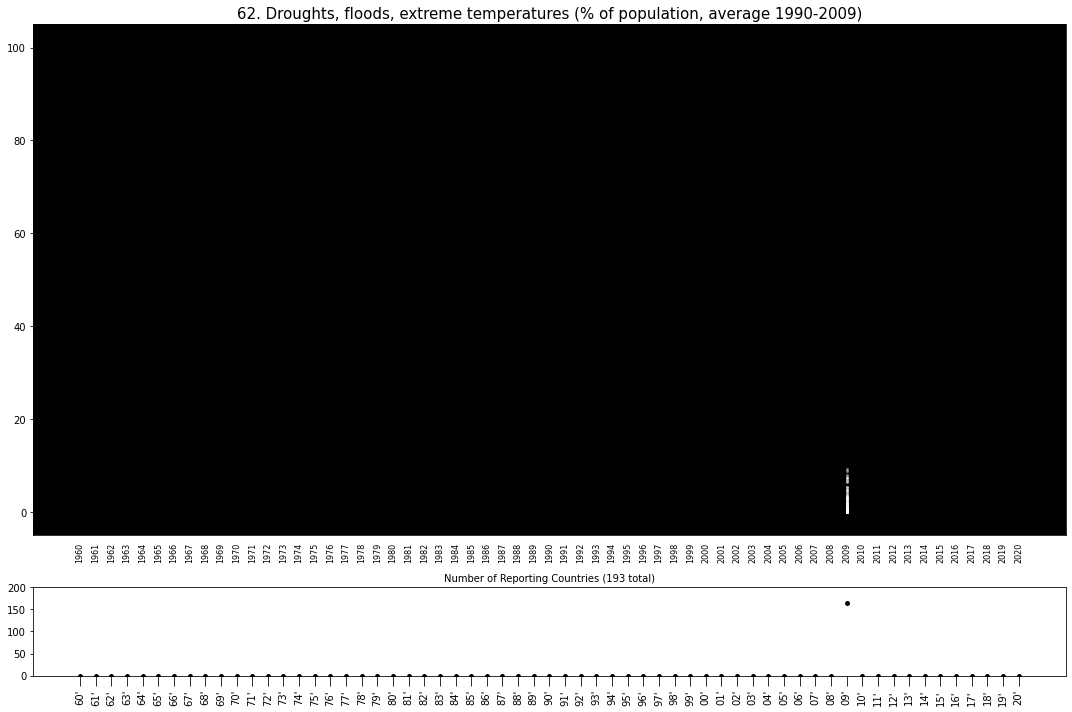

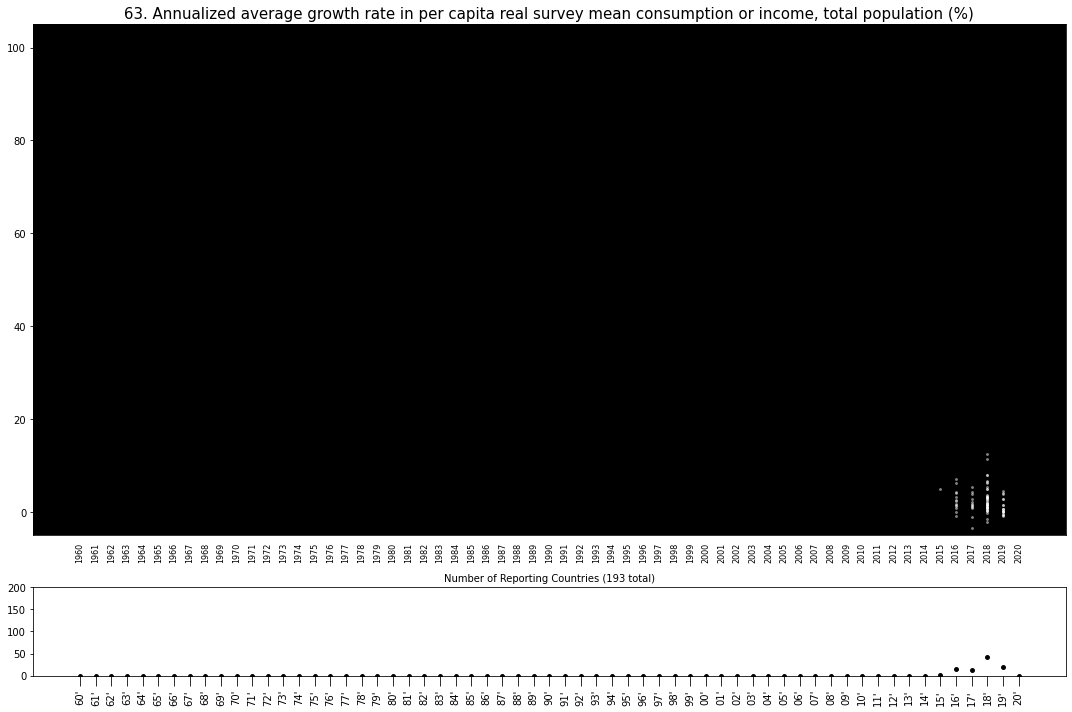

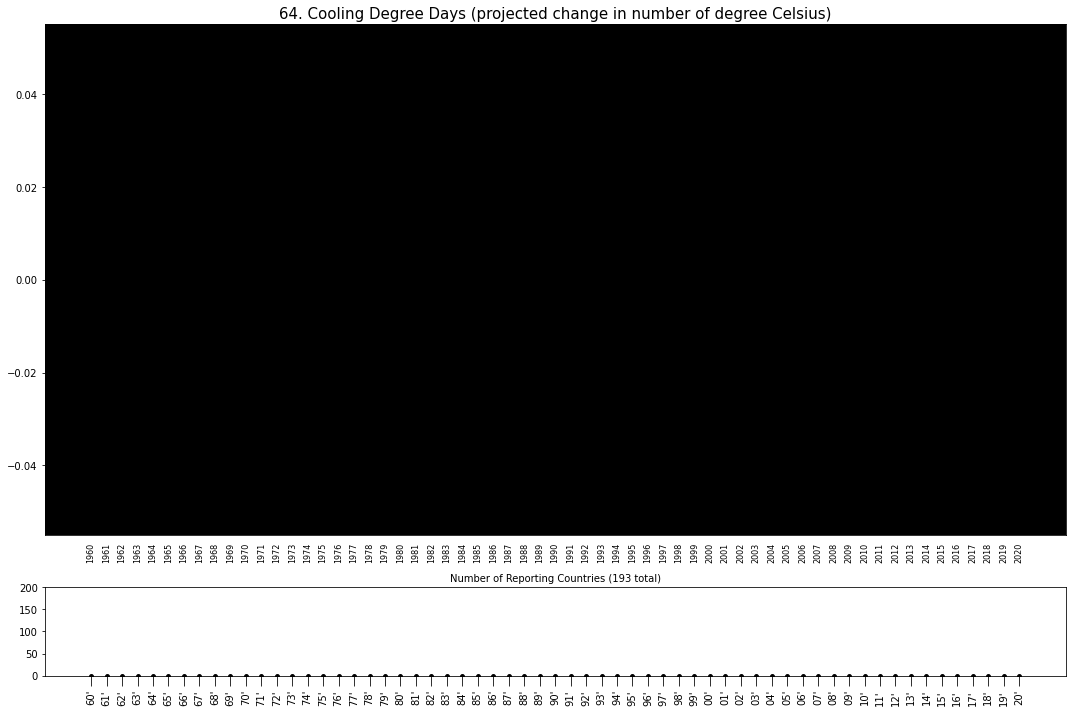

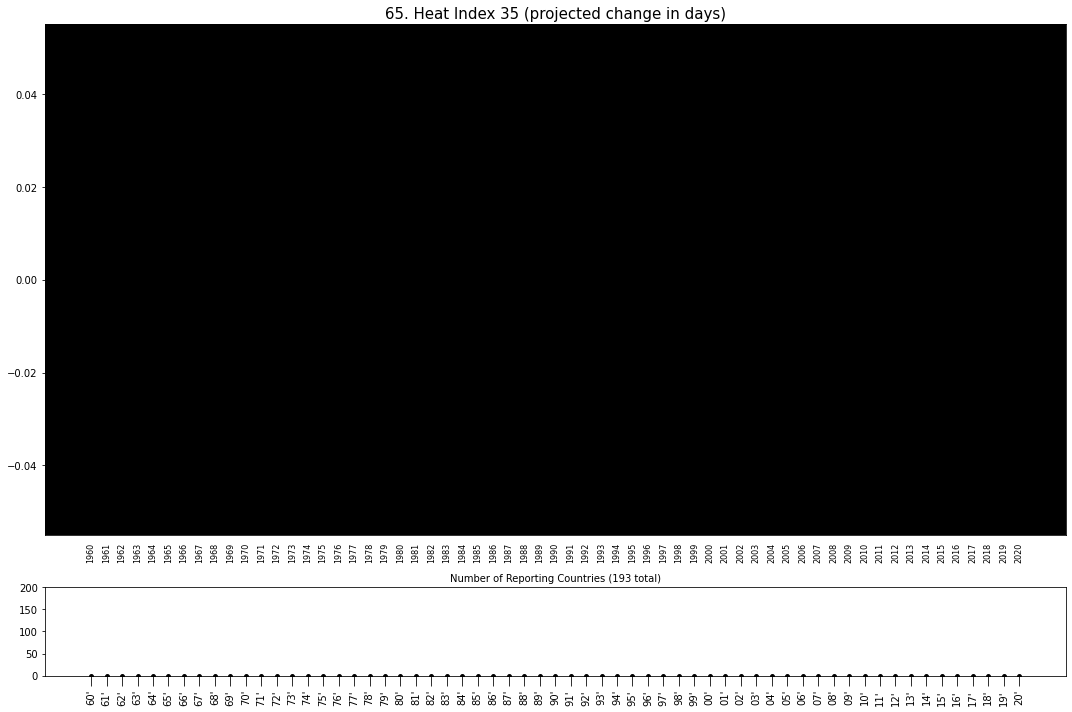

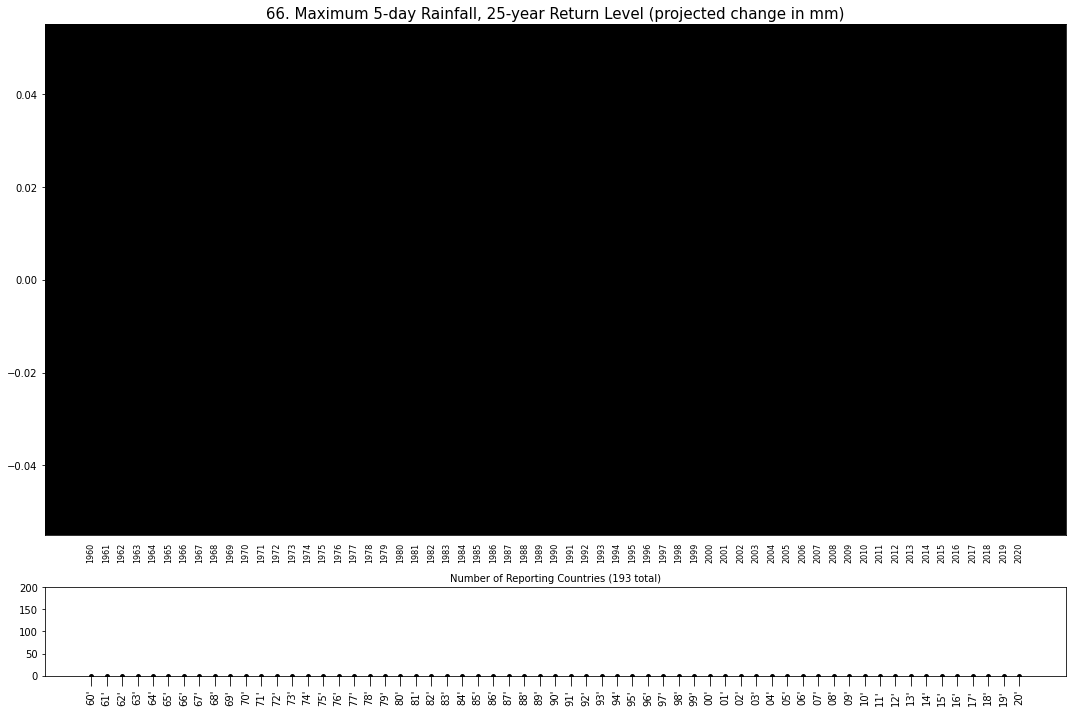

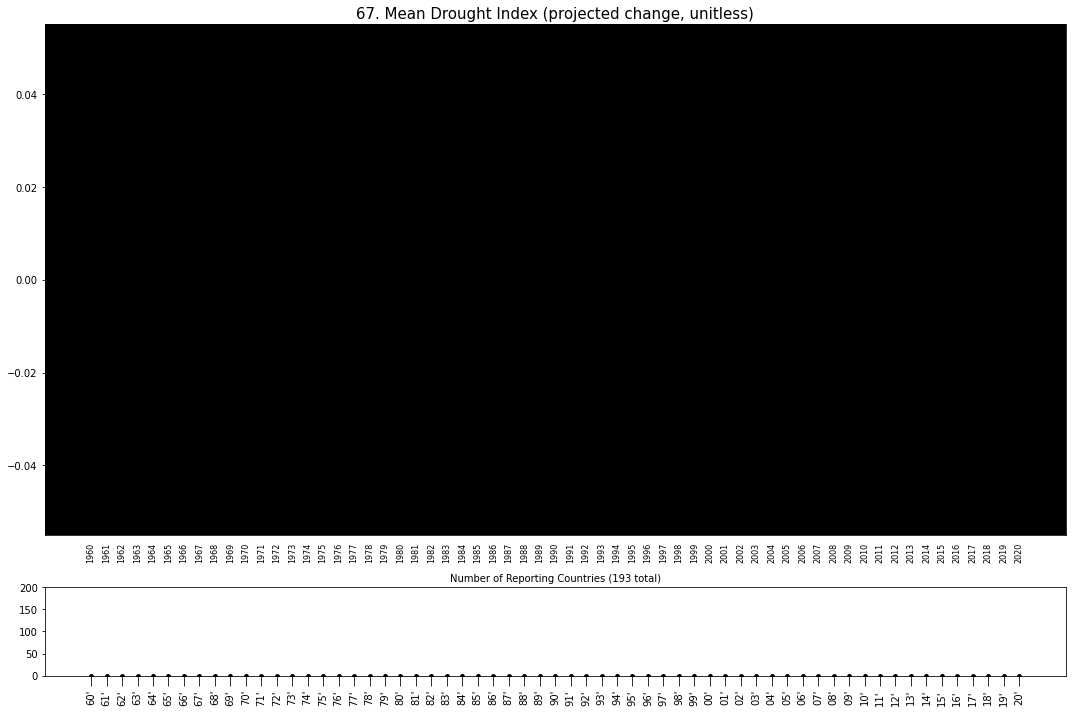

In [11]:
for p in range (0,67):
    plot_function(p)
